### Link to my Github repositry: https://github.com/Omar-HA-Issa/ML-fundamentals-2025

## Task 1: Exploratory Data Analysis

Dataset loaded: 17379 rows, 17 columns
Missing values: 0

Target Variable Analysis:

Target Variable (cnt) Statistics:
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64
Skewness: 1.28
Number of outliers: 505 (2.91% of data)

Temporal Features Analysis:


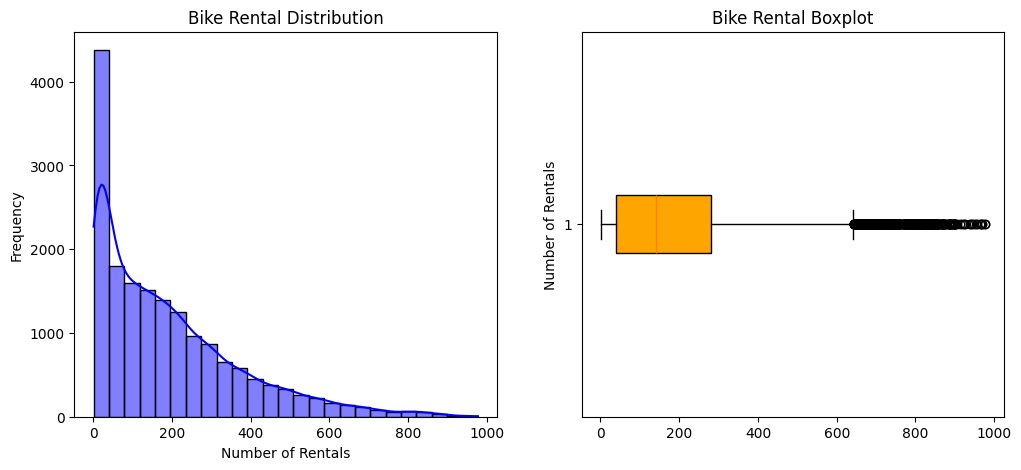

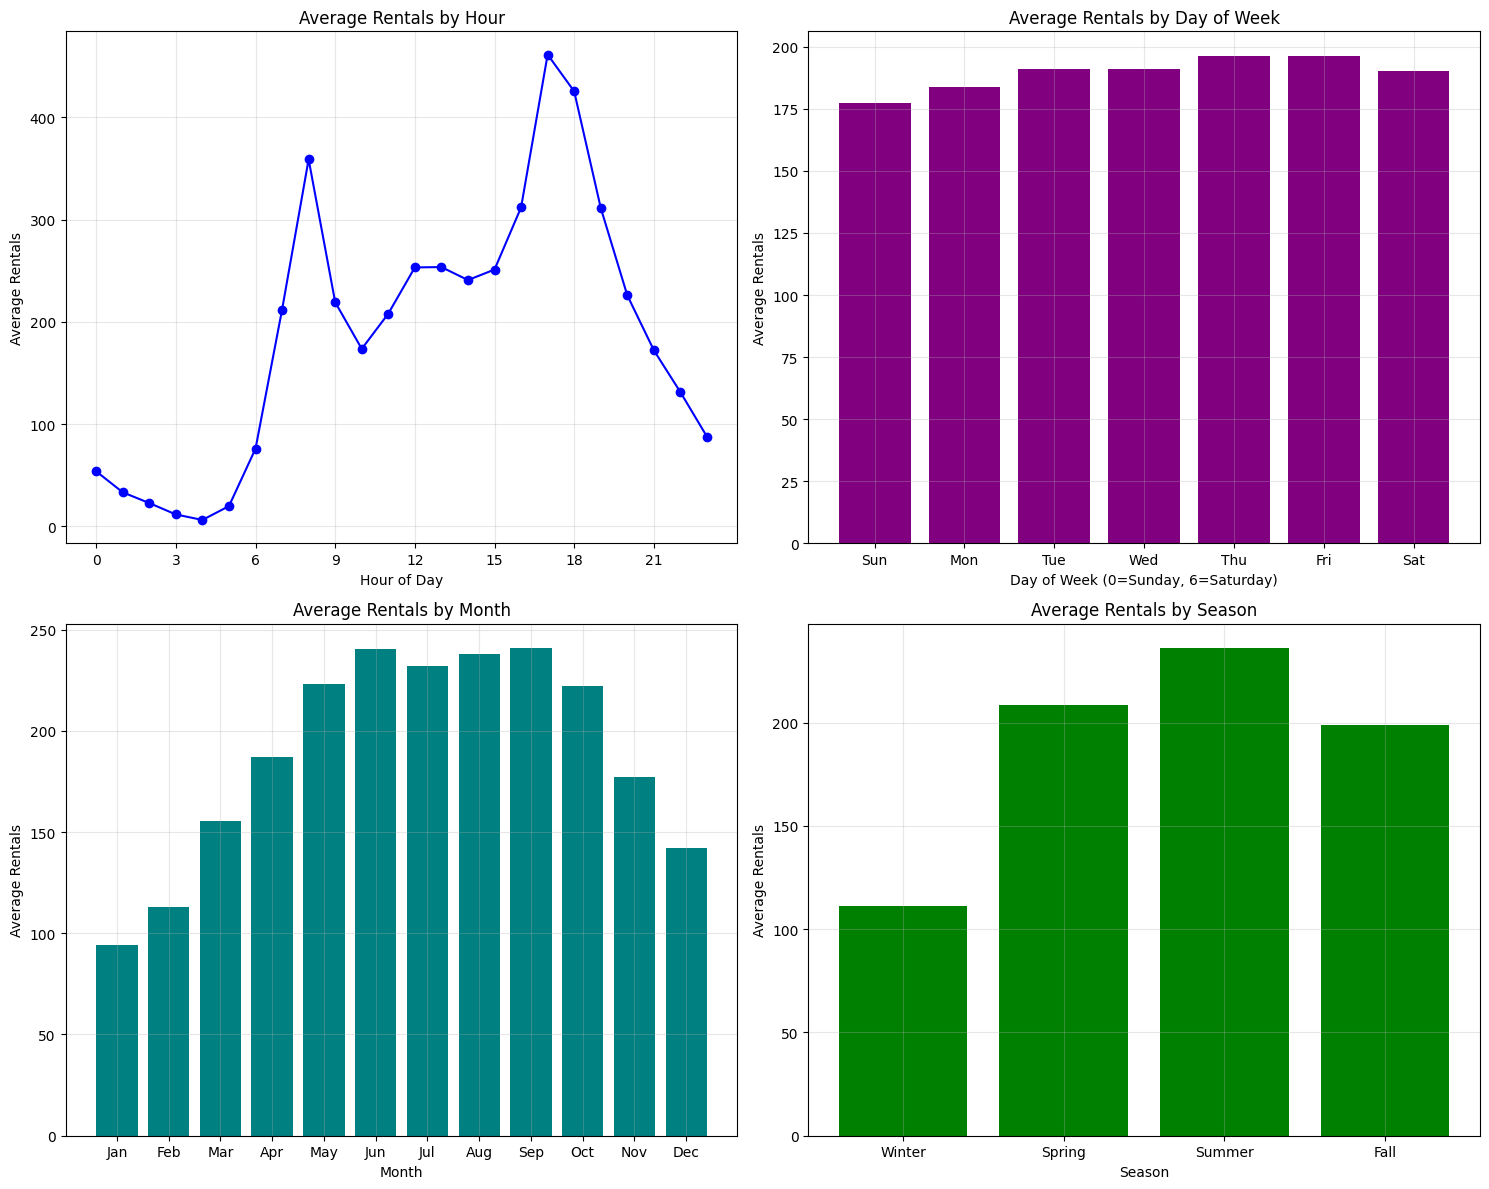


Binary Features Analysis:


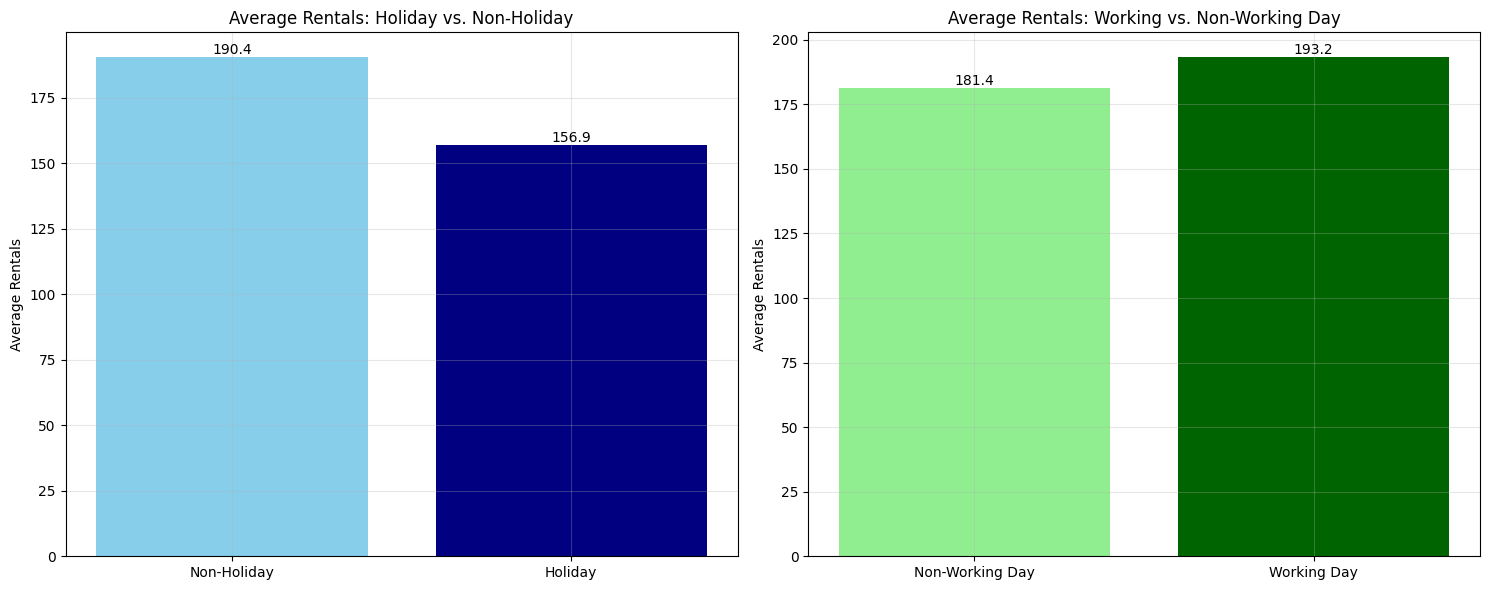


Weather-Related Features Analysis:


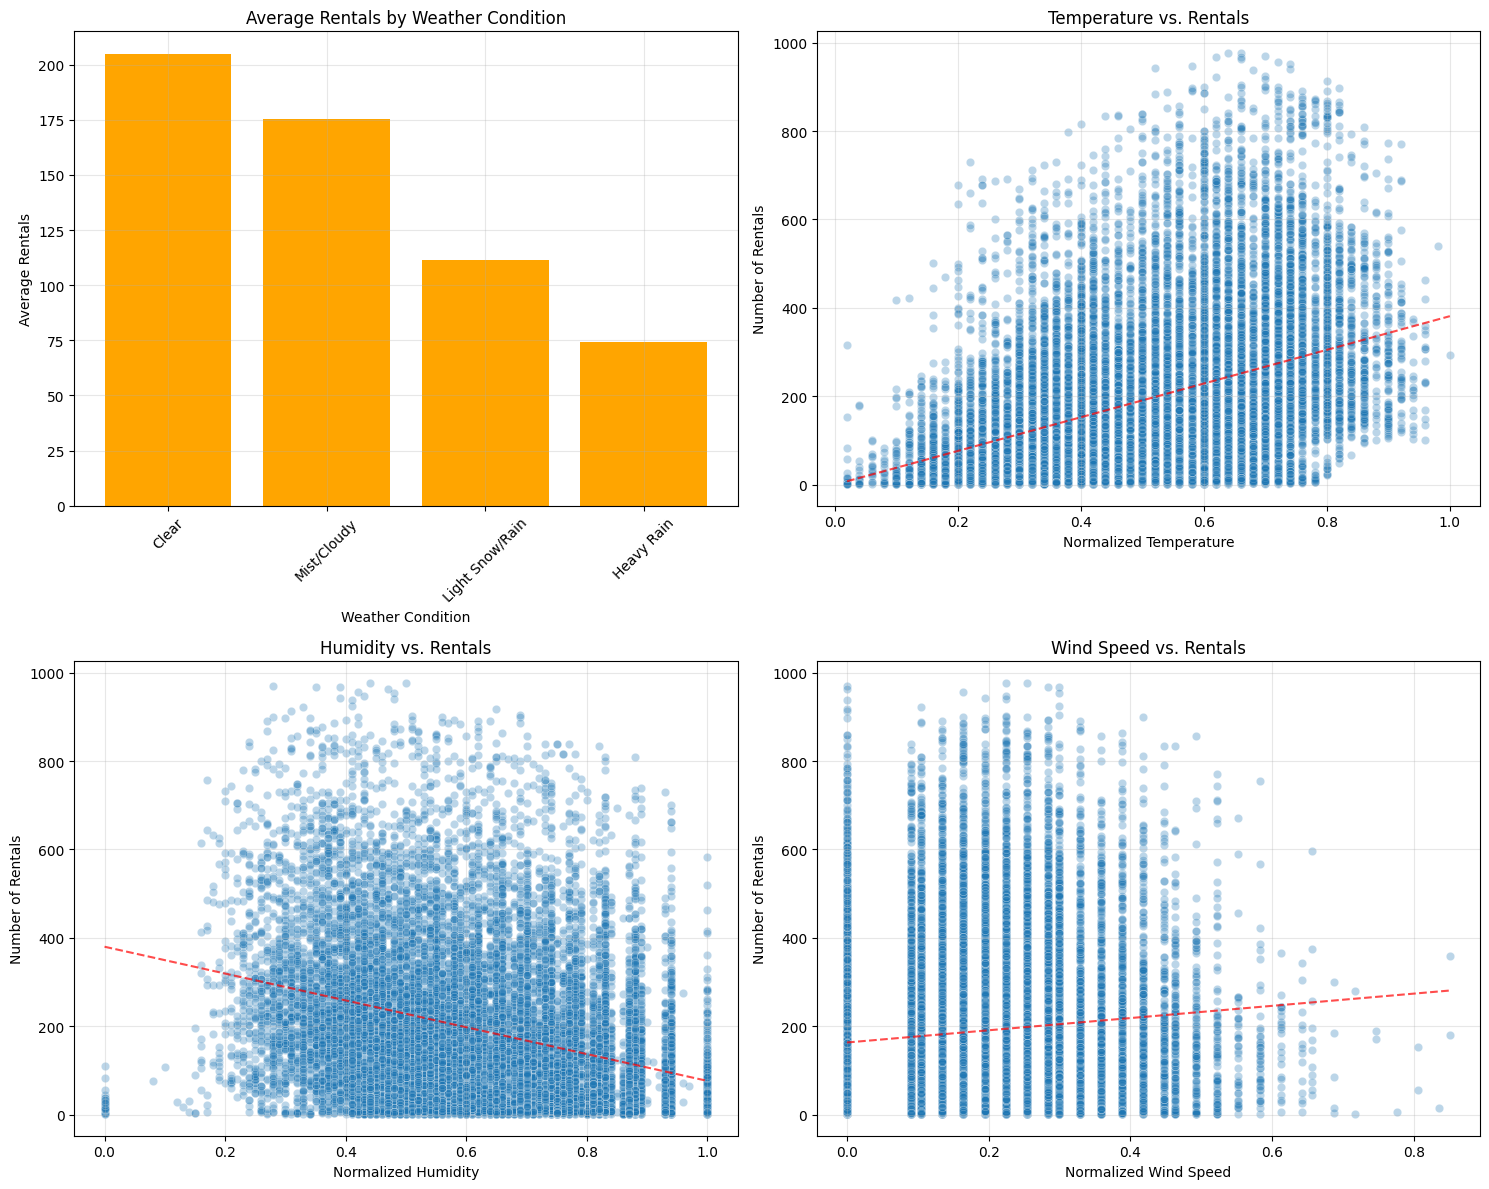


Correlation Matrix:


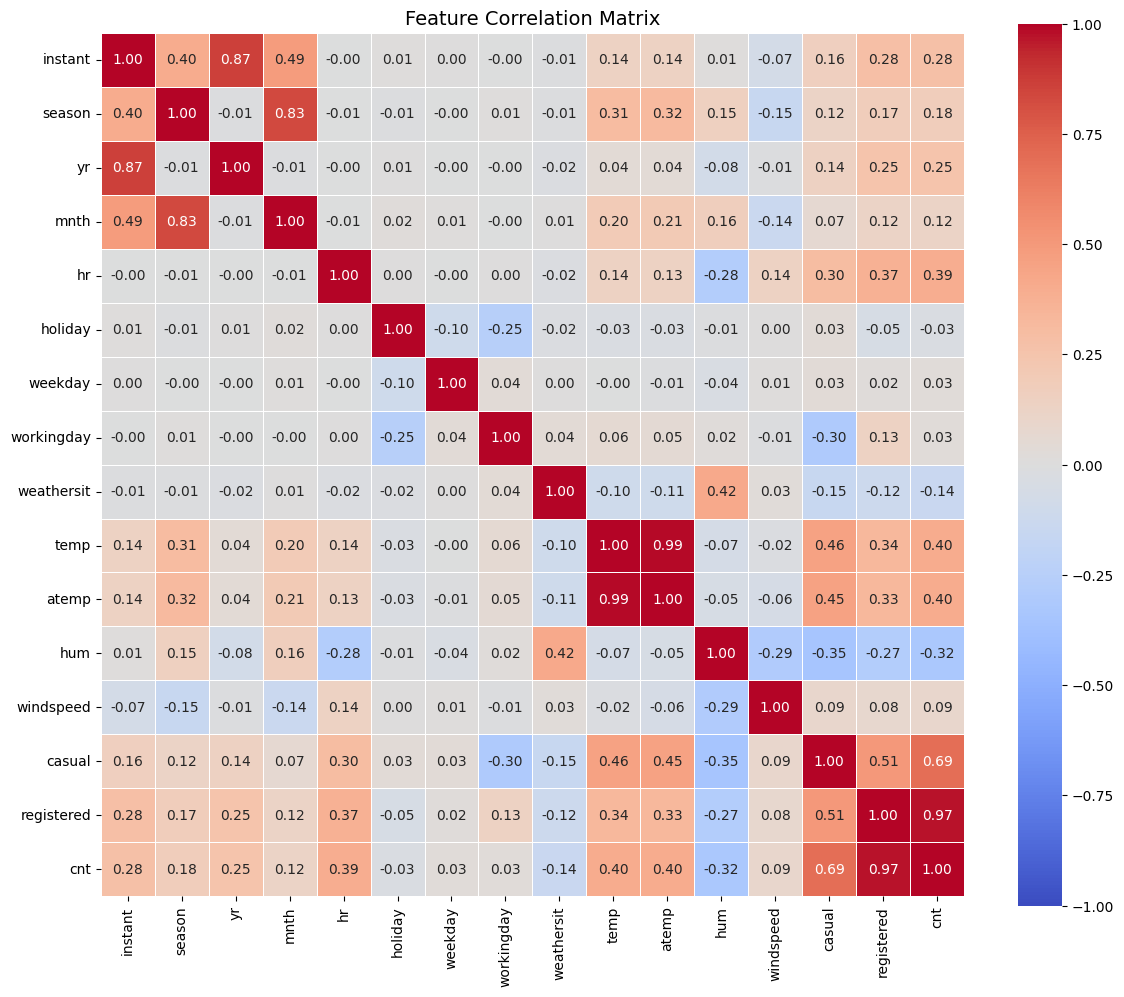

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv(r'C:\Users\Omar Issa\Downloads\hour.csv')
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Missing values: {df.isnull().sum().sum()}")

# Setting a style and figure size
plt.style.use('default')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.labelsize'] = 10 
plt.rcParams['axes.titlesize'] = 12

# ---- 1. Target Variable Analysis ----
print("\nTarget Variable Analysis:")
plt.figure(figsize=(12, 5))

# Calculate statistics and identify outliers
print("\nTarget Variable (cnt) Statistics:")
print(df['cnt'].describe())
print(f"Skewness: {df['cnt'].skew():.2f}")

Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}% of data)")

# Target distribution and boxplot:
plt.subplot(1, 2, 1)
sns.histplot(df['cnt'], bins=25, kde=True, color='blue')
plt.title('Bike Rental Distribution')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['cnt'], orientation='horizontal', patch_artist=True, boxprops=dict(facecolor='orange', color='black'))
plt.title('Bike Rental Boxplot')
plt.ylabel('Number of Rentals')

# ---- 2. Temporal Features Analysis ----
print("\nTemporal Features Analysis:")
plt.figure(figsize=(15, 12))

# Hour patterns
plt.subplot(2, 2, 1)
hourly = df.groupby('hr')['cnt'].mean()
plt.plot(hourly.index, hourly.values, 'o-', color='blue')
plt.title('Average Rentals by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24, 3))
plt.grid(True, alpha=0.3)

# Weekday patterns
plt.subplot(2, 2, 2)
weekday_avg = df.groupby('weekday')['cnt'].mean()
plt.bar(weekday_avg.index, weekday_avg.values, color='purple')
plt.title('Average Rentals by Day of Week')
plt.xlabel('Day of Week (0=Sunday, 6=Saturday)')
plt.ylabel('Average Rentals')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(True, alpha=0.3)

# Month patterns
plt.subplot(2, 2, 3)
monthly_avg = df.groupby('mnth')['cnt'].mean()
plt.bar(monthly_avg.index, monthly_avg.values, color='teal')
plt.title('Average Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)

# Season patterns
plt.subplot(2, 2, 4)
season_avg = df.groupby('season')['cnt'].mean()
season_names = ['Winter', 'Spring', 'Summer', 'Fall']
plt.bar(range(len(season_avg)), season_avg.values, color='green')
plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks(range(len(season_avg)), season_names)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---- 3. Binary Features Analysis ----
print("\nBinary Features Analysis:")
plt.figure(figsize=(15, 6))

# Holiday impact
plt.subplot(1, 2, 1)
holiday_avg = df.groupby('holiday')['cnt'].mean()
plt.bar(['Non-Holiday', 'Holiday'], holiday_avg.values, color=['skyblue', 'navy'])
plt.title('Average Rentals: Holiday vs. Non-Holiday')
plt.ylabel('Average Rentals')
plt.annotate(f"{holiday_avg[0]:.1f}", (0, holiday_avg[0]), ha='center', va='bottom')
plt.annotate(f"{holiday_avg[1]:.1f}", (1, holiday_avg[1]), ha='center', va='bottom')
plt.grid(True, alpha=0.3)

# Workingday impact
plt.subplot(1, 2, 2)
workingday_avg = df.groupby('workingday')['cnt'].mean()
plt.bar(['Non-Working Day', 'Working Day'], workingday_avg.values, color=['lightgreen', 'darkgreen'])
plt.title('Average Rentals: Working vs. Non-Working Day')
plt.ylabel('Average Rentals')
plt.annotate(f"{workingday_avg[0]:.1f}", (0, workingday_avg[0]), ha='center', va='bottom')
plt.annotate(f"{workingday_avg[1]:.1f}", (1, workingday_avg[1]), ha='center', va='bottom')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---- 4. Weather-Related Features Analysis ----
print("\nWeather-Related Features Analysis:")
plt.figure(figsize=(15, 12))

# Weather condition impact
plt.subplot(2, 2, 1)
weather_avg = df.groupby('weathersit')['cnt'].mean()
weather_labels = ['Clear', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain']
plt.bar(range(len(weather_avg)), weather_avg.values, color='orange')
plt.title('Average Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.xticks(range(len(weather_labels)), weather_labels, rotation=45)
plt.grid(True, alpha=0.3)

# Temperature effect
plt.subplot(2, 2, 2)
sns.scatterplot(x='temp', y='cnt', data=df, alpha=0.3)
plt.title('Temperature vs. Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Number of Rentals')
# Add trend line
z = np.polyfit(df['temp'], df['cnt'], 1)
p = np.poly1d(z)
plt.plot(np.sort(df['temp']), p(np.sort(df['temp'])), "r--", alpha=0.7)
plt.grid(True, alpha=0.3)

# Humidity effect
plt.subplot(2, 2, 3)
sns.scatterplot(x='hum', y='cnt', data=df, alpha=0.3)
plt.title('Humidity vs. Rentals')
plt.xlabel('Normalized Humidity')
plt.ylabel('Number of Rentals')
# Add trend line
z = np.polyfit(df['hum'], df['cnt'], 1)
p = np.poly1d(z)
plt.plot(np.sort(df['hum']), p(np.sort(df['hum'])), "r--", alpha=0.7)
plt.grid(True, alpha=0.3)

# Wind speed effect
plt.subplot(2, 2, 4)
sns.scatterplot(x='windspeed', y='cnt', data=df, alpha=0.3)
plt.title('Wind Speed vs. Rentals')
plt.xlabel('Normalized Wind Speed')
plt.ylabel('Number of Rentals')
# Add trend line
z = np.polyfit(df['windspeed'], df['cnt'], 1)
p = np.poly1d(z)
plt.plot(np.sort(df['windspeed']), p(np.sort(df['windspeed'])), "r--", alpha=0.7)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---- 5. Feature Correlations Analysis ----
# Feature Correlation Matrix
print("\nCorrelation Matrix:")
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', 
            square=True, linewidths=.5, vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()


## *Task 1: Remarks*

In this exploratory data analysis (EDA), I examined how various features influence bike rentals in the shared bicycle system. The following insights were gained from the EDA:

### Target Variable Analysis:

The bike rental count distribution revealed several key characteristics:
- Right-skewed distribution (skewness: 1.35)
- Contains approximately 2.9% outliers (primarily high rental counts)
- Shows considerable variability with rentals ranging from 1 to 977

### Temporal Features Analysis:

Temporal variables show strong influence on rental patterns:

1. **Hour of Day**: 
   - Peaks rentals at 8AM and 5-6PM
   - These peaks align with typical commuting hours, suggesting a significant commuter user base

2. **Day of Week**:
   - Working days (Monday-Friday) show different patterns than weekends
   - Weekdays exhibit stronger commuting patterns, while weekends show more evenly distributed rentals

3. **Month**:
   - Summer months (June-August) have highest average rentals
   - Winter months (December-February) show lowest rental counts

4. **Season**:
   - Summer has highest average rentals, followed by Fall, Spring, and Winter
   - Seasonal patterns suggest strong weather and temperature dependencies
   - Noted some inconsistencies in season assignments for certain months, which will be addressed in Task 3

### Binary Features Analysis:

Binary features revealed significant impacts on rental patterns:

1. **Holiday Impact**:
   - Rentals decrease by approximately 17.6% on holidays compared to non-holidays
   - Holiday hourly patterns differ from regular days, with less pronounced commuting peaks

2. **Working Day Impact**:
   - Working days show distinct hourly patterns with strong commuting peaks
   - Non-working days exhibit more evenly distributed rentals throughout the day

### Weather-Related Features Analysis:

Weather conditions strongly influence bicycle rental behavior:

1. **Weather Condition**:
   - Clear weather (value 1) has significantly higher rentals than other conditions
   - Rental counts decrease substantially with precipitation (values 3 and 4)

2. **Continuous Weather Variables**:
   - Temperature: Positive correlation with rentals
   - Humidity: Negative correlation with rentals
   - Wind Speed: Negative correlation with rentals
   - Temperature and feeling temperature (temp-atemp) show extremely high correlation (0.99)

### Feature Relationship Insights:

The correlation analysis revealed several important relationships:
- Strong collinearity between temp and atemp (0.99) suggests one could be removed
- Moderate correlation between year (yr) and rentals indicates growing system usage over time
- Seasonal features (season, mnth) show expected correlations with temperature


## Task 2: Data Splitting

In [129]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y) variables
X = df.drop('cnt', axis=1)  # All columns except the target
y = df['cnt']               # Target variable

# Splitting data into training (60%), validation (20%), and test sets (20%)
# First, creating a temp set for test set with 20% of the data
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Then, splitting the remaining 80% into training (60% total) and validation (20% total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42  
)

# Verifying the split proportions
print("\nDataset splitting results:")
print(f"Original: {len(X)} samples")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")


Dataset splitting results:
Original: 17379 samples
Training set: 10427 samples (60.0%)
Validation set: 3476 samples (20.0%)
Test set: 3476 samples (20.0%)


## *Task 2: Remarks*

### Explination and justification of the data splitting process:

- The dataset was split using a 60-20-20 split. Where 60% of the data was split into training and 20% into validation and the final 20% into test. This spit was followed to provide sufficient data for learning patterns, tuning hyperparameters, and conducting an unbiased final evaluation.
- A temp set was created to provide a clean separation in data splitting, ensuring the test set remains completely untouched during model development and preventing potential data leakage.

## *Task 3: Feature Engineering*

In [130]:
# ---- Block 1: Data Cleaning ----
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dropping unnecessary columns:
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
if 'atemp' in X_train.columns:
    columns_to_drop.append('atemp')
    
X_train = X_train.drop(columns=[col for col in columns_to_drop if col in X_train.columns])
X_val = X_val.drop(columns=[col for col in columns_to_drop if col in X_val.columns])
X_test = X_test.drop(columns=[col for col in columns_to_drop if col in X_test.columns])

print("Columns after dropping unnecessary features:")
print(X_train.columns.tolist())

# 2. Fixing season inconsistencies:
# Creating a correct mapping of months to seasons
correct_season_mapping = {
    12: 1,  # Winter (December)
    1: 1,   # Winter (January)
    2: 1,   # Winter (February)
    3: 2,   # Spring (March)
    4: 2,   # Spring (April)
    5: 2,   # Spring (May)
    6: 3,   # Summer (June)
    7: 3,   # Summer (July)
    8: 3,   # Summer (August)
    9: 4,   # Fall (September)
    10: 4,  # Fall (October)
    11: 4   # Fall (November)
}

# Applying season correction to all sets
X_train['season_original'] = X_train['season']
X_train['season'] = X_train['mnth'].map(correct_season_mapping)

X_val['season_original'] = X_val['season']
X_val['season'] = X_val['mnth'].map(correct_season_mapping)

X_test['season_original'] = X_test['season']
X_test['season'] = X_test['mnth'].map(correct_season_mapping)

# Dropping the original season column
X_train = X_train.drop(columns=['season_original'])
X_val = X_val.drop(columns=['season_original'])
X_test = X_test.drop(columns=['season_original'])



Columns after dropping unnecessary features:
['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']


In [131]:
# ---- Block 2: Cyclical Encoding for Hour and Weekday ----
def cyclical_encode(df, column, max_val):
    df[f'{column}_sin'] = np.sin(2 * np.pi * df[column] / max_val)
    df[f'{column}_cos'] = np.cos(2 * np.pi * df[column] / max_val)
    return df

X_train = cyclical_encode(X_train, 'hr', 24)  # 24-hour cycle (0-23)
X_val = cyclical_encode(X_val, 'hr', 24)
X_test = cyclical_encode(X_test, 'hr', 24)

X_train = cyclical_encode(X_train, 'weekday', 7)  # 7-day cycle (0-6)
X_val = cyclical_encode(X_val, 'weekday', 7)
X_test = cyclical_encode(X_test, 'weekday', 7)


In [132]:
# ---- Block 3: Creating Additional Engineered Features ----
print("\nAdditional engineered features:")

# 4.1 Rush Hour Indicator
X_train['is_rush_hour'] = ((X_train['hr'] >= 7) & (X_train['hr'] <= 9)) | ((X_train['hr'] >= 16) & (X_train['hr'] <= 19))
X_train['is_rush_hour'] = X_train['is_rush_hour'].astype(int)
X_val['is_rush_hour'] = ((X_val['hr'] >= 7) & (X_val['hr'] <= 9)) | ((X_val['hr'] >= 16) & (X_val['hr'] <= 19))
X_val['is_rush_hour'] = X_val['is_rush_hour'].astype(int)
X_test['is_rush_hour'] = ((X_test['hr'] >= 7) & (X_test['hr'] <= 9)) | ((X_test['hr'] >= 16) & (X_test['hr'] <= 19))
X_test['is_rush_hour'] = X_test['is_rush_hour'].astype(int)
print("- Added 'is_rush_hour' indicator")

# 4.2 Weekend Indicator
X_train['is_weekend'] = (X_train['weekday'].isin([0, 6])).astype(int)
X_val['is_weekend'] = (X_val['weekday'].isin([0, 6])).astype(int)
X_test['is_weekend'] = (X_test['weekday'].isin([0, 6])).astype(int)
print("- Added 'is_weekend' indicator")

# 4.3 Weather Comfort Score
X_train['weather_comfort'] = X_train['temp'] - X_train['hum'] - X_train['windspeed']
X_val['weather_comfort'] = X_val['temp'] - X_val['hum'] - X_val['windspeed']
X_test['weather_comfort'] = X_test['temp'] - X_test['hum'] - X_test['windspeed']
print("- Added 'weather_comfort' score")

# 4.4 Temperature-Humidity Interaction
X_train['temp_hum_interaction'] = X_train['temp'] * X_train['hum']
X_val['temp_hum_interaction'] = X_val['temp'] * X_val['hum']
X_test['temp_hum_interaction'] = X_test['temp'] * X_test['hum']
print("- Added 'temp_hum_interaction' term")


Additional engineered features:
- Added 'is_rush_hour' indicator
- Added 'is_weekend' indicator
- Added 'weather_comfort' score
- Added 'temp_hum_interaction' term


In [133]:
# ---- Block 4: One-Hot Encoding for Categorical Variables ----
categorical_features = ['season', 'weathersit', 'mnth']

# Initialize OneHotEncoder with handle_unknown='ignore'
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit on training data and transform
categorical_encoded_train = onehot_encoder.fit_transform(X_train[categorical_features])
categorical_encoded_val = onehot_encoder.transform(X_val[categorical_features])
categorical_encoded_test = onehot_encoder.transform(X_test[categorical_features])

# Get feature names for one-hot encoded columns
onehot_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

print(f"One-hot encoding applied to {categorical_features}")

One-hot encoding applied to ['season', 'weathersit', 'mnth']


C:\Users\Omar Issa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Omar Issa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [134]:
# ---- Block 5: Scaling Continuous Features ----
continuous_features = ['temp', 'hum', 'windspeed']

# Initializing StandardScaler
scaler = StandardScaler()

# Fitting on training data
scaler.fit(X_train[continuous_features])

# Transforming the data
X_train[continuous_features] = scaler.transform(X_train[continuous_features])
X_val[continuous_features] = scaler.transform(X_val[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

print(f"Scaling applied to {continuous_features}")

Scaling applied to ['temp', 'hum', 'windspeed']


In [135]:
# ---- Block 6: Final Dataset Preparation ----
# Dropping original categorical features and cyclical features after transformation
X_train = X_train.drop(columns=['hr', 'weekday'] + categorical_features)
X_val = X_val.drop(columns=['hr', 'weekday'] + categorical_features)
X_test = X_test.drop(columns=['hr', 'weekday'] + categorical_features)

# Adding one-hot encoded features
encoded_train_df = pd.DataFrame(categorical_encoded_train, columns=onehot_feature_names, index=X_train.index)
encoded_val_df = pd.DataFrame(categorical_encoded_val, columns=onehot_feature_names, index=X_val.index)
encoded_test_df = pd.DataFrame(categorical_encoded_test, columns=onehot_feature_names, index=X_test.index)

# Joining the encoded features
X_train = pd.concat([X_train, encoded_train_df], axis=1)
X_val = pd.concat([X_val, encoded_val_df], axis=1)
X_test = pd.concat([X_test, encoded_test_df], axis=1)



Final Feature Engineering Summary:
- Final features: 30
- Training samples: 10427
- Validation samples: 3476
- Test samples: 3476

Top 10 features by correlation with target:
            Feature  Correlation
10     is_rush_hour     0.497500
12  weather_comfort     0.448171
7            hr_cos     0.408982
6            hr_sin     0.401601
3              temp     0.401139
4               hum     0.321689
0                yr     0.255730
15         season_3     0.153435
18     weathersit_3     0.127054
19           mnth_2     0.126894


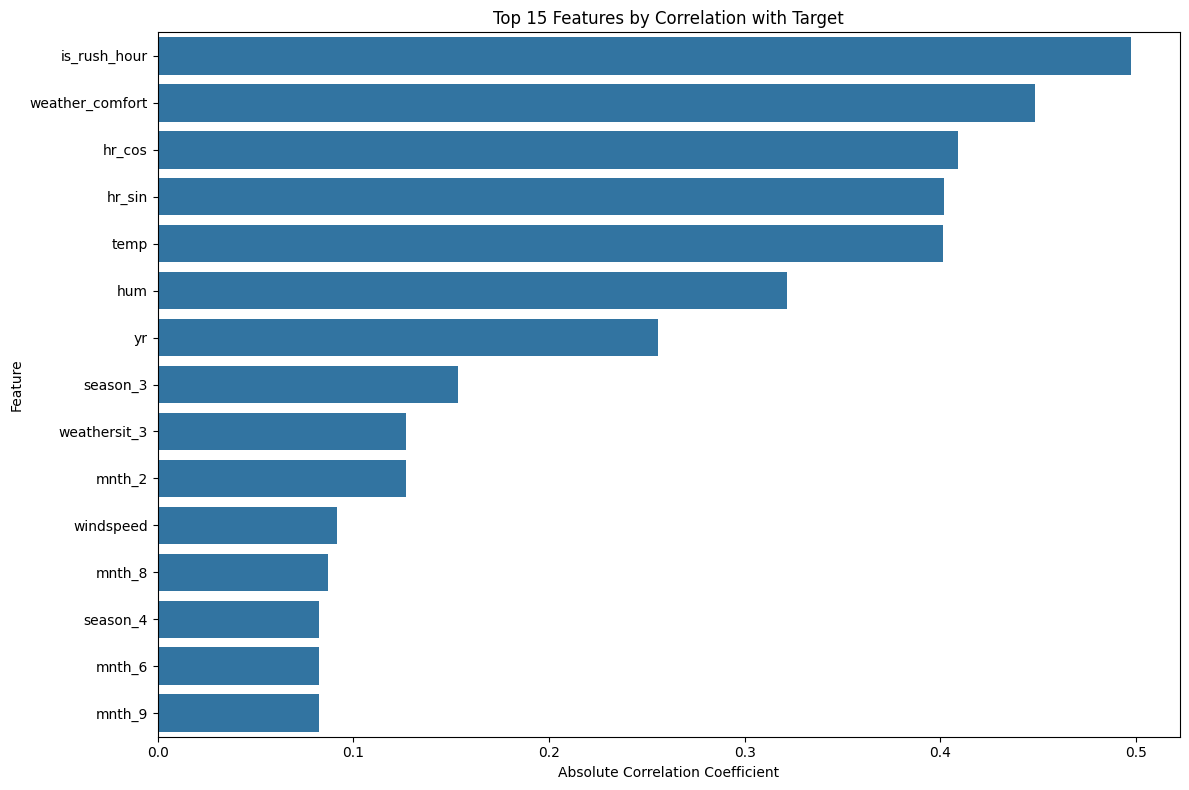

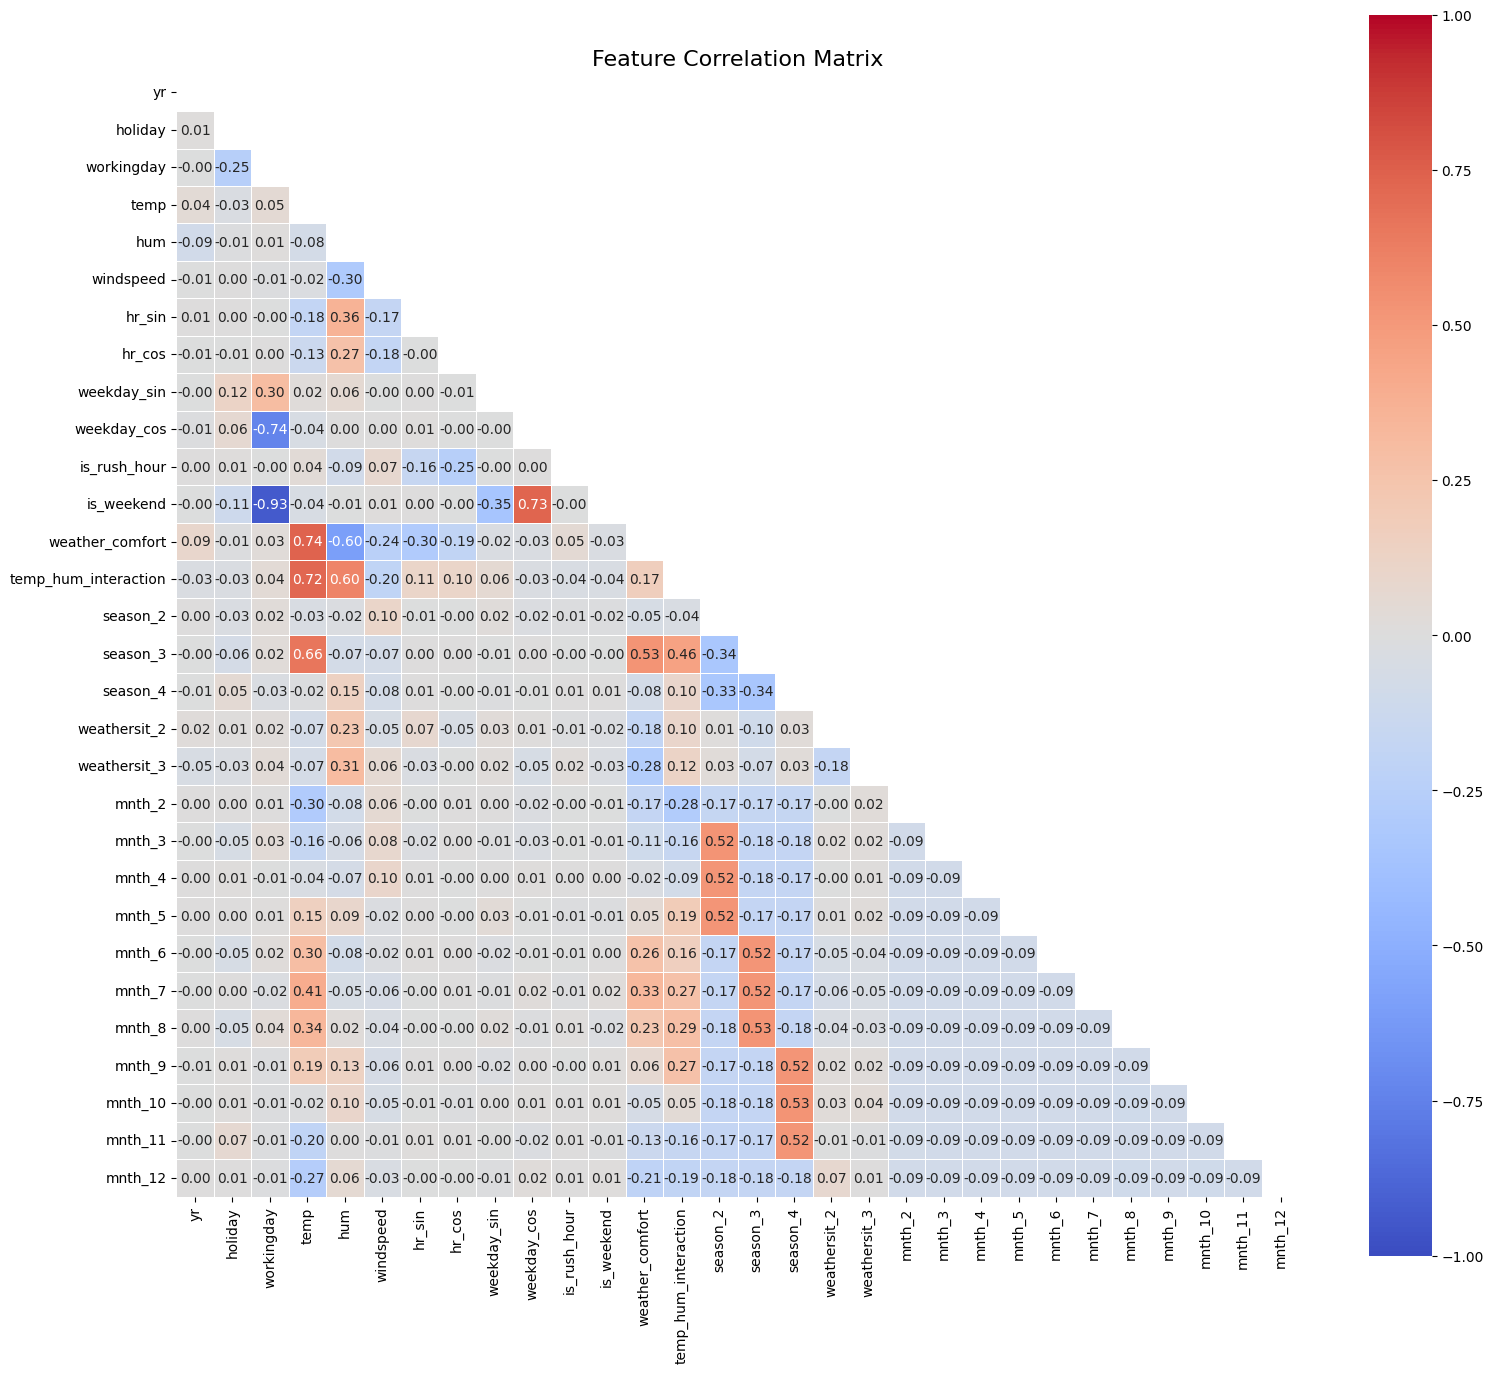

In [136]:
# ---- Block 7: Feature Analysis ----
# Final feature engineering summary
print("\nFinal Feature Engineering Summary:")
print(f"- Final features: {X_train.shape[1]}")
print(f"- Training samples: {X_train.shape[0]}")
print(f"- Validation samples: {X_val.shape[0]}")
print(f"- Test samples: {X_test.shape[0]}")

# Feature correlation with target
feature_corr = pd.DataFrame({
    'Feature': X_train.columns,
    'Correlation': [abs(X_train[col].corr(y_train)) for col in X_train.columns]
})
feature_corr = feature_corr.sort_values('Correlation', ascending=False)

# Visualizing feature importance
plt.figure(figsize=(12, 8))
top_features = feature_corr.head(15)
sns.barplot(x='Correlation', y='Feature', data=top_features)
plt.title('Top 15 Features by Correlation with Target')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(16, 14))
corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## *Task 3: Remarks*

In this task, I implemented comprehensive feature engineering to prepare the bike rental dataset for modeling. The process included data cleaning, handling categorical features, creating engineered features, and applying appropriate scaling.

### 1) Data Cleaning Process:

**Removing Features**:

I removed the following features:

- `instant`: Record index without predictive value  
- `dteday`: Date information already captured in other features  
- `casual` and `registered`: Components of the target variable  
- `atemp`: Highly correlated with `temp` (correlation > 0.9)

Removing these features helps prevent data leakage, redundancy of data, and reduces multicollinearity, which is particularly important for the linear regression model in "Task 4".

**Seasonal Correction**

During EDA, I identified inconsistencies in the `season` column where some months were assigned to incorrect seasons. I implemented a correction based on meteorological seasons:

- **Winter (1):** December, January, February  
- **Spring (2):** March, April, May  
- **Summer (3):** June, July, August  
- **Fall (4):** September, October, November

This correction ensures that the seasonal patterns in the data are accurately represented, which is crucial for modeling weather-dependent bike rental patterns. Additionally it aids in better model performance, as it can better understand that each month has only one month assigned to, instead of a transition month having two seasons attributed to it.

### 2) Cyclical Feature Encoding:

For the time-related features with the cyclical patterns, a sine and cosine transformation was applied:

- `hr` (24-hour cycle): Encoded as `hr_sin` and `hr_cos`  
- `weekday` (7-day cycle): Encoded as `weekday_sin` and `weekday_cos`

It is important that this encoding transformation was adopted as standard numerical encoding would create artificial boundaries (e.g., hour 23 would appear far from hour 0). This approach allows the models to recognize that, for example, late night is adjacent to early morning in the daily cycle.

### 3) Additional Engineered Features:

Based on patterns observed in the EDA, I created several engineered features:

- **Rush Hour Indicator (`is_rush_hour`)**: Binary feature identifying peak commuting hours (7–9 AM and 4–7 PM). This feature was created to capture significant rental spikes during the rush hour times, i.e. when people usually go to work and back home. As more people would be inclined to use a bike to skip congestion on the road or public transport.
- **Weekend Indicator (`is_weekend`)**: Binary feature identifying weekend days, which showed different rental patterns compared to weekdays. 
- **Weather Comfort Score (`weather_comfort`)**: A feature combining temperature (positive effect), humidity (negative effect), and wind speed (negative effect) into a single metric representing overall weather pleasantness for cycling. This feature aids in understanding how different weather conditions can influence the likeleness of people renting a bike on a given day.
- **Temperature-Humidity Interaction (`temp_hum_interaction`)**: Captures how temperature and humidity work together to affect perceived comfort, as high humidity makes warm temperatures feel more uncomfortable.
- **Difference between `temp_hum_interaction` and `weather_comfort` features**: The `temp_hum_interaction` feature specifically models the interaction effect between temperature and humidity. Meaning that it zooms in on how these two variables together impact comfort (e.g., hot + humid = worse than just hot).  Meanwhile the `weather_comfort` feature is a composite score that summarizes multiple weather conditions and generally can be equated as a "how nice is the weather?" feature.

### 4) One-Hot Encoding and Scaling

To prepare categorical features for modeling:

- Applied **one-hot encoding** to `season`, `weathersit`, and `mnth`
- Ensured the encoder was aware of all possible category values across train/validation/test sets, to avoid making the model confused. 

For continuous features:

- Applied **StandardScaler** to `temp`, `hum`, and `windspeed`
- Fit the scaler **only on the training data** and applied the same transformation to validation and test sets

This ensures the model works with standardized features while preventing data leakage.

### Feature Analysis Results:

The correlation analysis revealed the strongest predictors of bike rentals:

- Temperature-related features (high positive correlation)
- Hour of day features (`hr_sin`, `hr_cos`)
- Season indicators (especially summer)
- Weather comfort score

These predictors are expected as these features naturally determine the amount of bike's being rented on a particular day.

Some engineered features showed high correlations with each other, particularly:

- `weather_comfort` and `temp`
- `is_weekend` and workday-related features

These correlations could potentially be removed for the linear model in "Task 4". As linear models may be more sensitive to high collinearity between features compared to tree-based models.


## Task 4: Linear Regression Model


Linear Regression Model Evaluation:
--------------------------------------------------
Training MSE: 12416.17
Training RMSE: 111.43
Training MAE: 82.65
Training R²: 0.6286
--------------------------------------------------
Validation MSE: 11644.79
Validation RMSE: 107.91
Validation MAE: 79.90
Validation R²: 0.6419
---------------------------------------------------
Bias-Variance Analysis:
Training RMSE: 111.43
Validation RMSE: 107.91
Difference: -3.52
Percent Increase: -3.16%
Model shows low variance (good generalization)
Model shows high bias (underfitting)
---------------------------------------------------

Model Visualization:


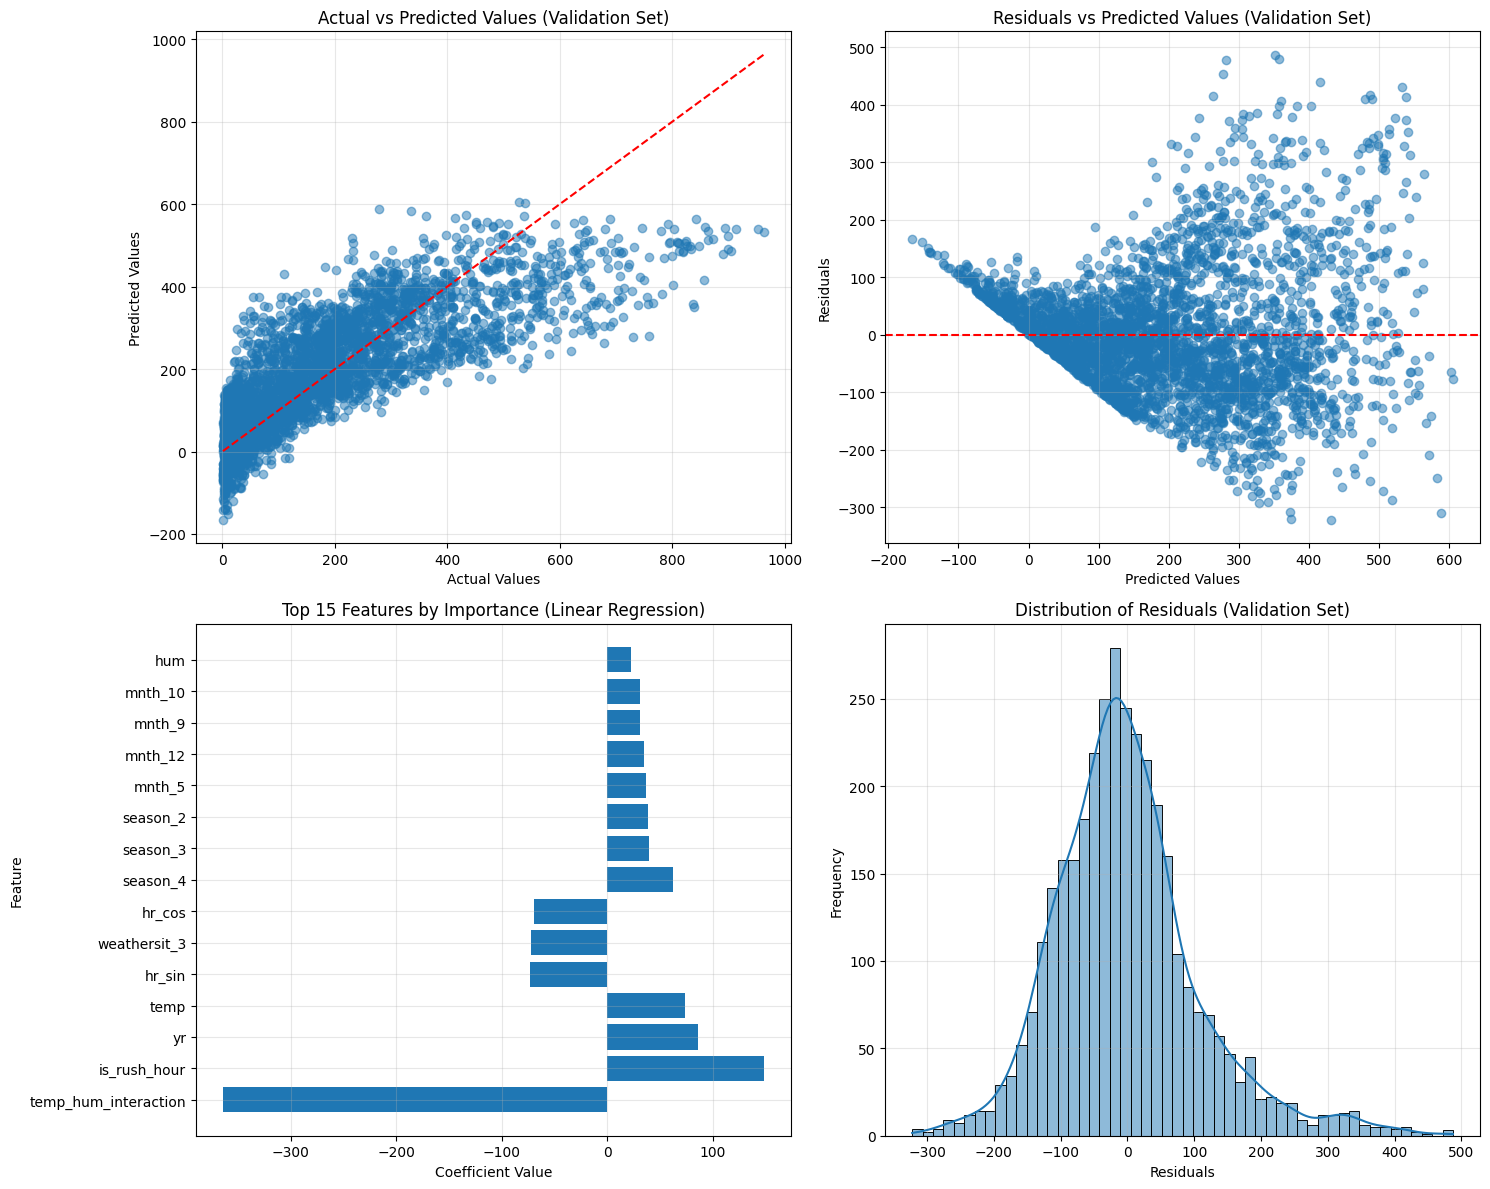

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

# Initializing the model
lr_model = LinearRegression()

# Training the model on the training data
lr_model.fit(X_train, y_train)

# Making predictions on training and validation sets
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

# Calculating metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculating metrics for validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Printing the evaluation metrics
print("\nLinear Regression Model Evaluation:")
print("-" * 50)
print(f"Training MSE: {train_mse:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training MAE: {train_mae:.2f}")
print(f"Training R²: {train_r2:.4f}")
print("-" * 50)
print(f"Validation MSE: {val_mse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation R²: {val_r2:.4f}")
print("---------------------------------------------------")

# Printing bias-variance analysis
print("Bias-Variance Analysis:")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Difference: {val_rmse - train_rmse:.2f}")
print(f"Percent Increase: {((val_rmse - train_rmse) / train_rmse) * 100:.2f}%")

print("---------------------------------------------------")
print("\nModel Visualization:")

# Feature importance analysis (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Calculating residuals
train_residuals = y_train - y_train_pred
val_residuals = y_val - y_val_pred

# Creating a figure with multiple subplots for model analysis
plt.figure(figsize=(15, 12))

# Plot 1: Actual vs Predicted values for validation set
plt.subplot(2, 2, 1)
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Validation Set)')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals vs Predicted values for validation set
plt.subplot(2, 2, 2)
plt.scatter(y_val_pred, val_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.grid(True, alpha=0.3)

# Plot 3: Feature importance
plt.subplot(2, 2, 3)
top_features = feature_importance.head(15)  # Show top 15 features
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 15 Features by Importance (Linear Regression)')
plt.grid(True, alpha=0.3)

# Plot 4: Histogram of residuals for validation set
plt.subplot(2, 2, 4)
sns.histplot(val_residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Validation Set)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## *Task 4: Remarks*

There are several important information gained from this linear regression model:

**1) Performance Metrics Analysis:**

- Training RMSE and Validation RMSE: This indicates the model's predictions are, on average, off by about 110 bikes. For a bike-sharing system, this represents a substantial error margin.
- Training R² and Validation R²: The model explains only about 63-64% of the variance in bike rentals. While this shows some predictive power, it leaves approximately 36% of the variance unexplained, confirming the limitations visible in the scatter plots.
- Training MAE and Validation MAE: The mean absolute error being lower than RMSE indicates the presence of some larger errors that disproportionately affect the RMSE.

**2) Bias-Variance Analysis:**

The validation RMSE is slightly better than the training RMSE. This suggests the model has a low variance meaning good generalization, yet has a high bias indicating underfitting of data. This result was expected as this model struggles in understanding non-linear data. 

**3) Analysis of Plots:** 

- *Actual vs Predicted Values Plot*: The scatter plot shows a positive correlation between actual and predicted values. However, there are several issues. The model struggles to predict higher rental counts accurately. There are some negative predicted values, which is problematic since bike rentals cannot be negative. This indicates a limitation in the linear model's ability to handle the non-linear nature of the data.
- *Residuals vs Predicted Values Plot*: The residuals show increasing spread with higher predicted values. Their non-random pattern suggests the linear model is missing important non-linear relationships in the data.
- *Feature Importance Plot*: `temp_hum_interaction` has a large negative coefficient, suggesting this interaction strongly reduces predicted rentals.
`is_rush_hour` has the largest positive coefficient, confirming that rush hours significantly increase bike rentals. Temporal features (`hr_sin`, `hr_cos`) and temperature (`temp`) have substantial influence. Seasonal variables (`months` and `seasons`) have moderate effects on predictions.
- *Distributions of Residuals Plot*: It's approximately normal but with a slight right skew. The presence of outliers, particularly on the positive side (300-500), indicates the model tends to underpredict for some scenarios. The width of this model's distribution indicates substantial prediction errors.

**Conclusion:**
The linear regression model, as indicated, acts as a baseline for the later models. This model is good at predicting linear data, yet struggles with non-linear data. It also shows issues with underfitting. These issues will be addressed by the other models used in this assignment.
  
***Note***: *Several attempts were made to imporve the performance of the model before settling on this current version of the model. These efforts were explored in **Task 8** of this assignment.*


## Task 5: Random Forest Regressor

Model training completed in 2.16 seconds

Random Forest Model Evaluation:
--------------------------------------------------
Training MSE: 2295.02
Training RMSE: 47.91
Training MAE: 33.69
Training R²: 0.9313
--------------------------------------------------
Validation MSE: 3351.68
Validation RMSE: 57.89
Validation MAE: 40.50
Validation R²: 0.8969
--------------------------------------------------
Bias-Variance Analysis:
Training RMSE: 47.91
Validation RMSE: 57.89
Difference: 9.99
Percent Increase: 20.85%
Model shows a good bias-variance trade-off
--------------------------------------------------
Comparison with Linear Regression Baseline:
Linear Regression Validation RMSE: 107.91
Random Forest Validation RMSE: 57.89
Improvement: 50.02 (46.35%)
Linear Regression Validation R²: 0.6419
Random Forest Validation R²: 0.8969
Improvement: 0.2550 (39.73%)
---------------------------------------------------

Model Visualization:


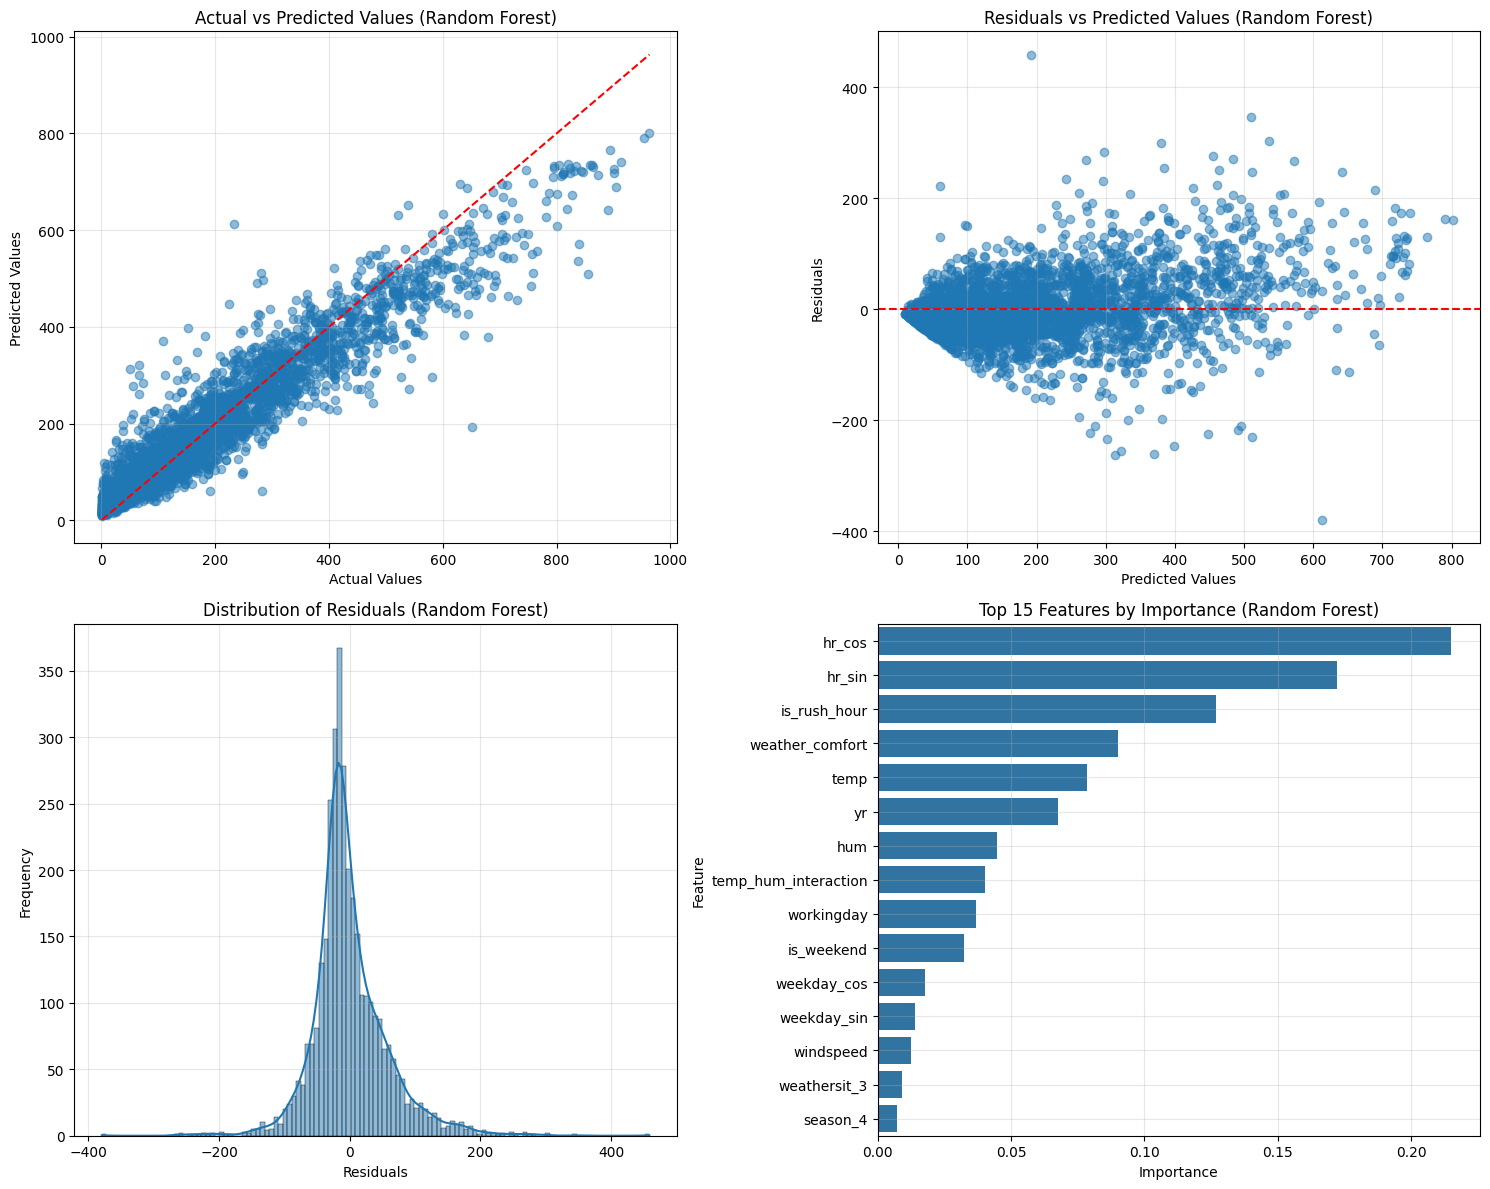

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

# Initializing the model with default parameters
start_time = time.time()
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,             
    min_samples_split=5,     
    min_samples_leaf=3,       
    max_features='sqrt',      
    random_state=42
)


# Training the model
rf_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Model training completed in {training_time:.2f} seconds")

# Making predictions
y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)

# Calculating metrics for training set
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Calculating metrics for validation set
val_mse_rf = mean_squared_error(y_val, y_val_pred_rf)
val_rmse_rf = np.sqrt(val_mse_rf)
val_mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)

# Printing the evaluation metrics
print("\nRandom Forest Model Evaluation:")
print("-" * 50)
print(f"Training MSE: {train_mse_rf:.2f}")
print(f"Training RMSE: {train_rmse_rf:.2f}")
print(f"Training MAE: {train_mae_rf:.2f}")
print(f"Training R²: {train_r2_rf:.4f}")
print("-" * 50)
print(f"Validation MSE: {val_mse_rf:.2f}")
print(f"Validation RMSE: {val_rmse_rf:.2f}")
print(f"Validation MAE: {val_mae_rf:.2f}")
print(f"Validation R²: {val_r2_rf:.4f}")
print("-" * 50)

# Printing bias-variance analysis
print("Bias-Variance Analysis:")
print(f"Training RMSE: {train_rmse_rf:.2f}")
print(f"Validation RMSE: {val_rmse_rf:.2f}")
print(f"Difference: {val_rmse_rf - train_rmse_rf:.2f}")
print(f"Percent Increase: {((val_rmse_rf - train_rmse_rf) / train_rmse_rf) * 100:.2f}%")
    
# Comparing with Linear Regression baseline
print("-" * 50)
print("Comparison with Linear Regression Baseline:")
print(f"Linear Regression Validation RMSE: {val_rmse:.2f}")
print(f"Random Forest Validation RMSE: {val_rmse_rf:.2f}")
print(f"Improvement: {val_rmse - val_rmse_rf:.2f} ({((val_rmse - val_rmse_rf) / val_rmse) * 100:.2f}%)")
print(f"Linear Regression Validation R²: {val_r2:.4f}")
print(f"Random Forest Validation R²: {val_r2_rf:.4f}")
print(f"Improvement: {val_r2_rf - val_r2:.4f} ({((val_r2_rf - val_r2) / val_r2) * 100:.2f}%)")
print("---------------------------------------------------")
print("\nModel Visualization:")

# Calculating residuals
val_residuals_rf = y_val - y_val_pred_rf

# Creating Graph Visualizations
plt.figure(figsize=(15, 12))

# Plot 1: Actual vs Predicted values for validation set
plt.subplot(2, 2, 1)
plt.scatter(y_val, y_val_pred_rf, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals vs Predicted values
plt.subplot(2, 2, 2)
plt.scatter(y_val_pred_rf, val_residuals_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Random Forest)')
plt.grid(True, alpha=0.3)

# Plot 3: Histogram of residuals
plt.subplot(2, 2, 3)
sns.histplot(val_residuals_rf, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Random Forest)')
plt.grid(True, alpha=0.3)

# Plot 4: Feature importance
plt.subplot(2, 2, 4)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
top_features = feature_importance.head(15)
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 15 Features by Importance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## *Task 5: Remarks*

There are several important insights gained from the Random Forest model:

**1) Performance Metrics Analysis:**

- *Training RMSE and Validation RMSE:* The model's predictions are, on average, off by about 50-60 bikes, representing a significant improvement over the linear regression model's error of ~110 bikes.
- *Training R² and Validation R²:* The model explains approximately 90% of the variance in bike rentals, a substantial improvement from the linear model's 64%. This demonstrates the Random Forest's superior ability to capture complex patterns in the data.
- *Training MAE and Validation MAE:* Lower values compared to the linear model indicate more accurate predictions overall, with fewer large errors.

**2) Bias-Variance Analysis:**

The validation RMSE is higher than the training RMSE by 9.99 (a 20.85% increase). This indicates moderate overfitting, but within an acceptable range given the substantial performance improvement. The model shows a good bias-variance trade-off, with low bias (high training R²) and moderate variance.

**3) Analysis of Plots:**

- *Actual vs Predicted Values Plot*: Points cluster more tightly around the reference line compared to the linear model. There are no negative predicted values, addressing a key limitation of the linear model. The model still shows some difficulty with very high rental counts (>700), where it tends to underpredict, but this is less pronounced than with the linear regression model.
- *Residuals vs Predicted Values Plot*: Residuals are more balanced around zero, and the patterns seen in the linear model are much less noticeable. There's still some variation in spread, but it's smaller, with most errors within ±200 bike rentals.
- *Distribution of Residuals Plot*: The distribution is approximately normal and more tightly centered around zero with a sharper peak, indicating more predictions with small errors. The more symmetric distribution suggests the model isn't systematically over or underpredicting.
- *Feature Importance Plot*: Hour features (`hr_cos` and `hr_sin`) are the most important predictors, highlighting the importance of daily cycles in bike rentals. `is_rush_hour` remains highly important, consistent with biking patterns. Weather-related features (`weather_comfort`, `temp`) have substantial influence. The model also captures the importance of annually varying factors (`yr`).

**4) Comparison with Linear Regression:**

RMSE Improvement: 46.35% reduction in validation RMSE
R² Improvement: 39.73% increase in validation R²
These substantial improvements validate the notion that the Random Forest Model is better at capturing this dataset's complex features compared to the linear regression model.

**Conclusion:**

The Random Forest model represents a significant advancement over the linear baseline. It captures non-linear relationships and feature interactions that the linear model couldn't express. The feature importance ranking provides valuable insights into key drivers of bike rental patterns. While there is some evidence of overfitting, the overall bias-variance tradeoff is good, with high predictive power and reasonable generalization.

***Note:*** *Additional tuning of the Random Forest model was performed in **Task 7** to further optimize its performance and address the moderate overfitting observed here.*

## Task 6: Gradient Boosting Regressor

Model training completed in 3.29 seconds

Gradient Boosting Model Evaluation:
--------------------------------------------------
Training MSE: 4197.39
Training RMSE: 64.79
Training MAE: 45.24
Training R²: 0.8744
--------------------------------------------------
Validation MSE: 4150.60
Validation RMSE: 64.43
Validation MAE: 44.72
Validation R²: 0.8724
--------------------------------------------------
Bias-Variance Analysis:
Training RMSE: 64.79
Validation RMSE: 64.43
Difference: -0.36
Percent Increase: -0.56%
Model shows a good bias-variance trade-off
--------------------------------------------------
Comparison with Previous Models:
Linear Regression Validation RMSE: 107.91
Random Forest Validation RMSE: 57.89
Gradient Boosting Validation RMSE: 64.43
Linear Regression Validation R²: 0.6419
Random Forest Validation R²: 0.8969
Gradient Boosting Validation R²: 0.8724
---------------------------------------------------

Model Visualization:


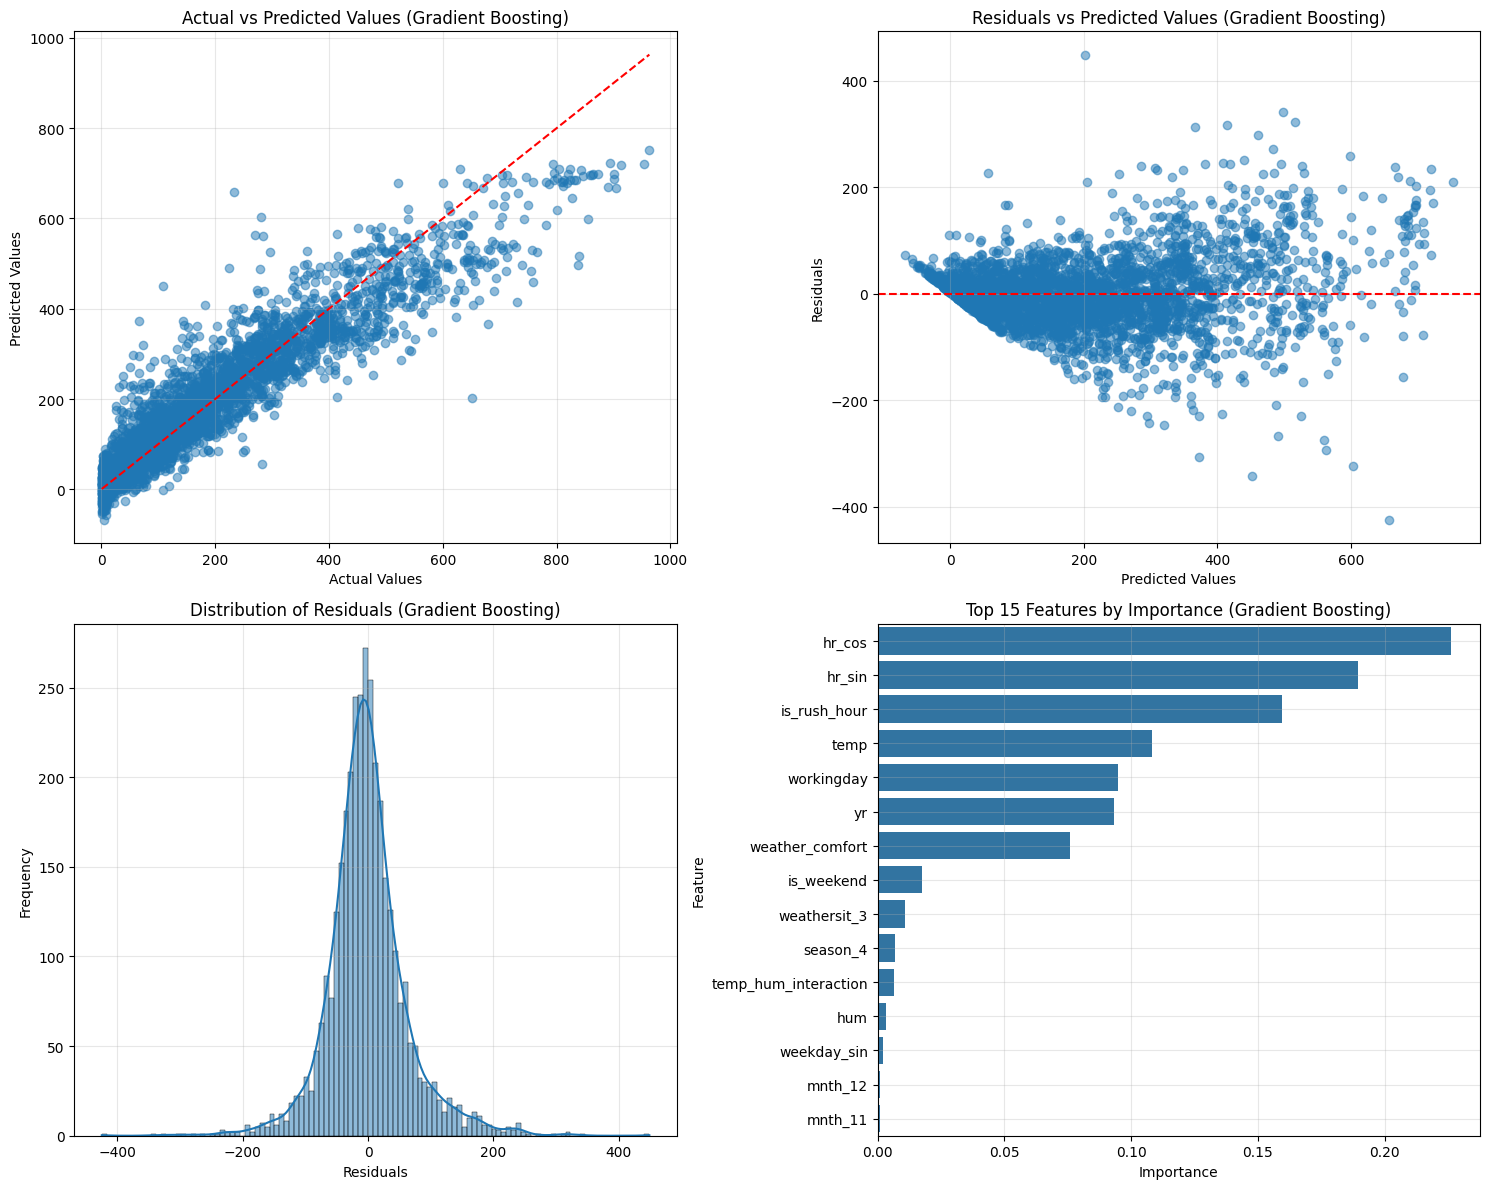

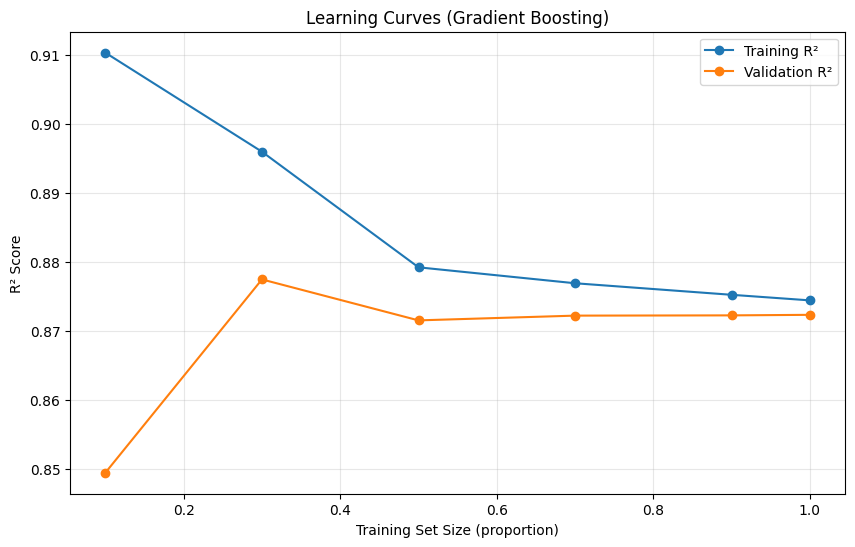

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

# Initializing the model with basic parameters
start_time = time.time()
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Training the model
gb_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Model training completed in {training_time:.2f} seconds")

# Making predictions
y_train_pred_gb = gb_model.predict(X_train)
y_val_pred_gb = gb_model.predict(X_val)

# Calculating metrics for training set
train_mse_gb = mean_squared_error(y_train, y_train_pred_gb)
train_rmse_gb = np.sqrt(train_mse_gb)
train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb)
train_r2_gb = r2_score(y_train, y_train_pred_gb)

# Calculating metrics for validation set
val_mse_gb = mean_squared_error(y_val, y_val_pred_gb)
val_rmse_gb = np.sqrt(val_mse_gb)
val_mae_gb = mean_absolute_error(y_val, y_val_pred_gb)
val_r2_gb = r2_score(y_val, y_val_pred_gb)

# Printing the evaluation metrics
print("\nGradient Boosting Model Evaluation:")
print("-" * 50)
print(f"Training MSE: {train_mse_gb:.2f}")
print(f"Training RMSE: {train_rmse_gb:.2f}")
print(f"Training MAE: {train_mae_gb:.2f}")
print(f"Training R²: {train_r2_gb:.4f}")
print("-" * 50)
print(f"Validation MSE: {val_mse_gb:.2f}")
print(f"Validation RMSE: {val_rmse_gb:.2f}")
print(f"Validation MAE: {val_mae_gb:.2f}")
print(f"Validation R²: {val_r2_gb:.4f}")
print("-" * 50)

# Printing bias-variance analysis
print("Bias-Variance Analysis:")
print(f"Training RMSE: {train_rmse_gb:.2f}")
print(f"Validation RMSE: {val_rmse_gb:.2f}")
print(f"Difference: {val_rmse_gb - train_rmse_gb:.2f}")
print(f"Percent Increase: {((val_rmse_gb - train_rmse_gb) / train_rmse_gb) * 100:.2f}%")

# Comparing with previous models
print("-" * 50)
print("Comparison with Previous Models:")
print(f"Linear Regression Validation RMSE: {val_rmse:.2f}")
print(f"Random Forest Validation RMSE: {val_rmse_rf:.2f}")
print(f"Gradient Boosting Validation RMSE: {val_rmse_gb:.2f}")
print(f"Linear Regression Validation R²: {val_r2:.4f}")
print(f"Random Forest Validation R²: {val_r2_rf:.4f}")
print(f"Gradient Boosting Validation R²: {val_r2_gb:.4f}")
print("---------------------------------------------------")
print("\nModel Visualization:")

# Calculating residuals
val_residuals_gb = y_val - y_val_pred_gb

# Creating Graph Visualizations
plt.figure(figsize=(15, 12))

# Plot 1: Actual vs Predicted values for validation set
plt.subplot(2, 2, 1)
plt.scatter(y_val, y_val_pred_gb, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Gradient Boosting)')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals vs Predicted values
plt.subplot(2, 2, 2)
plt.scatter(y_val_pred_gb, val_residuals_gb, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Gradient Boosting)')
plt.grid(True, alpha=0.3)

# Plot 3: Histogram of residuals
plt.subplot(2, 2, 3)
sns.histplot(val_residuals_gb, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Gradient Boosting)')
plt.grid(True, alpha=0.3)

# Plot 4: Feature importance
plt.subplot(2, 2, 4)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
top_features = feature_importance.head(15)
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 15 Features by Importance (Gradient Boosting)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Defining training size proportions
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
train_scores = []
val_scores = []

for size in train_sizes:
    
    train_idx = int(len(X_train) * size)   
    subset_model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
    subset_model.fit(X_train[:train_idx], y_train[:train_idx])
    train_pred = subset_model.predict(X_train[:train_idx])
    val_pred = subset_model.predict(X_val)
    train_r2 = r2_score(y_train[:train_idx], train_pred)
    val_r2 = r2_score(y_val, val_pred)
    
    train_scores.append(train_r2)
    val_scores.append(val_r2)

# Plotting learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, 'o-', label='Training R²')
plt.plot(train_sizes, val_scores, 'o-', label='Validation R²')
plt.xlabel('Training Set Size (proportion)')
plt.ylabel('R² Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## *Task 6: Remarks*

There are several important insights gained from the Gradient Boosting model:

**1) Performance Metrics Analysis:**

- Training RMSE and Validation RMSE: The model's predictions are, on average, off by about 64 bikes. This is better than the linear regression model (around 110 bikes) but not as accurate as the Random Forest model (around 58 bikes).
- Training R² and Validation R²: The model explains approximately 87% of the variance in bike rentals, a substantial improvement from the linear model's 64%, but slightly lower than the Random Forest's 90%.
- Training MAE and Validation MAE: These values indicate the average absolute error is about 45 bikes, higher than Random Forest but still a significant improvement over linear regression.

**2) Bias-Variance Analysis:**

The validation RMSE is slightly lower than the training RMSE by 0.36 (a -0.56% difference). This exceptional balance between training and validation performance indicates very good generalization with minimal overfitting. This is the model's most standout characteristic compared to the other models.

**3) Analysis of Plots:**

- *Actual vs Predicted Values Plot:* The points show good alignment with the reference line, similar to Random Forest. There are no negative predicted values, and the model handles the range of rental counts well, though it still struggles somewhat with very high counts.
- *Residuals vs Predicted Values Plot:* The residuals are mostly centered around zero with a balanced pattern. There's still some variation at higher predicted values, but it's less noticeable than in the linear model.
- *Distribution of Residuals Plot:* The distribution is approximately normal and tightly centered around zero with a sharp peak, indicating consistent prediction accuracy. 
- *Feature Importance Plot:* Similar to Random Forest, hour features (`hr_cos` and `hr_sin`) are the most important predictors. `is_rush_hour` and `temp` remain highly important. The model places more emphasis on `workingday` and less on `weather_comfort` compared to Random Forest.
- *Learning Curve Plot:* The learning curve shows that the Gradient Boosting model improves and stabilizes quickly with more data, indicating strong generalization and minimal overfitting. The close alignment of training and validation R² confirms a well-balanced model with robust performance.

**4) Comparison with Previous Models:**

- *RMSE Comparison*: While the Gradient Boosting validation RMSE is higher than Random Forest, it shows very good consistency between training and validation performance.
- *R² Comparison*: The Gradient Boosting validation R² is lower than Random Forest but still represents a major improvement over linear regression.
- *Bias-Variance Tradeoff*: This is where Gradient Boosting truly shines, with almost identical training and validation metrics, indicating optimal generalization.

**Conclusion:**

The Gradient Boosting model represents a middle ground in terms of raw predictive accuracy but excels in generalization ability. It demonstrates the best bias-variance tradeoff among all models, with nearly identical training and validation performance. Its feature importance is similar to Random Forest’s, confirming the main factors that affect bike rentals.

***Note:*** *Further tuning of the Gradient Boosting model was performed in **Task 7** to improve its predictive accuracy while maintaining its  generalization properties.*

## Task 7: Hyperparameter Tuning


1. Random Forest Hyperparameter Tuning:
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Tuned Random Forest Performance:
--------------------------------------------------
Training RMSE: 22.39
Training R²: 0.9850
Validation RMSE: 46.61
Validation R²: 0.9332

Comparison with Original Random Forest:
--------------------------------------------------
Original Training RMSE: 47.91 → Tuned: 22.39
Original Validation RMSE: 57.89 → Tuned: 46.61
Original Training R²: 0.9313 → Tuned: 0.9850
Original Validation R²: 0.8969 → Tuned: 0.9332
Training/Validation RMSE gap: -9.99 → -24.21

2. Gradient Boosting Hyperparameter Tuning:
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Tuned Gradient Boosting Performance:
--------------------------------------------------
Training RMSE: 32.37
Training R²: 0.9687
Validation RMSE: 44.00
Validation R²: 0.9405
Gap (Train-Val RMSE): -11.63

Comparison with Original Gradient Boosting:
-------------------------------------------------

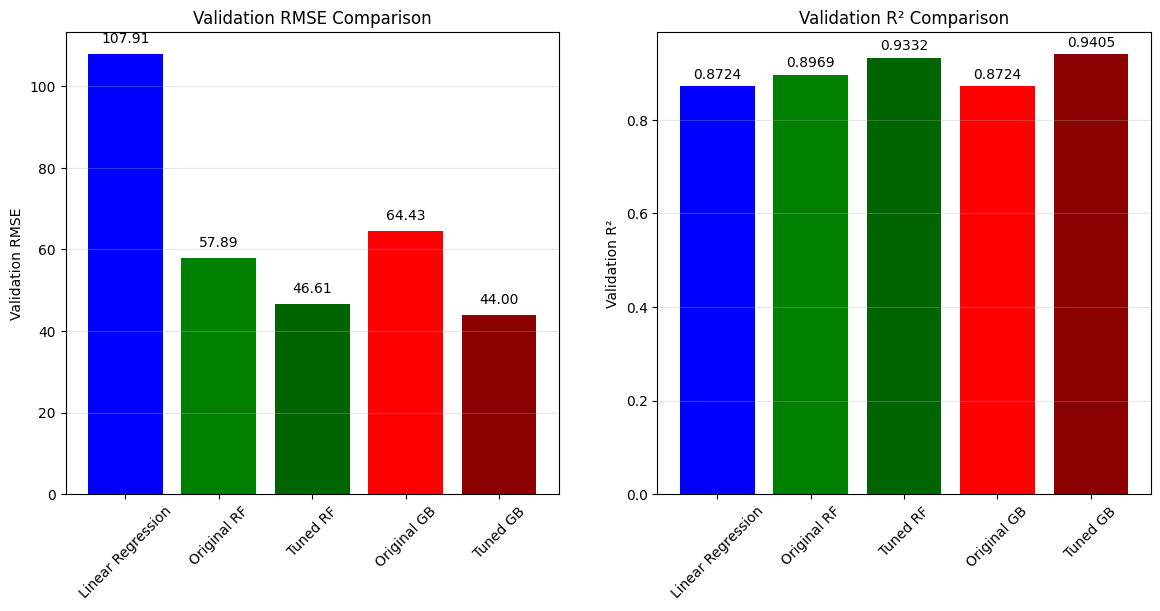

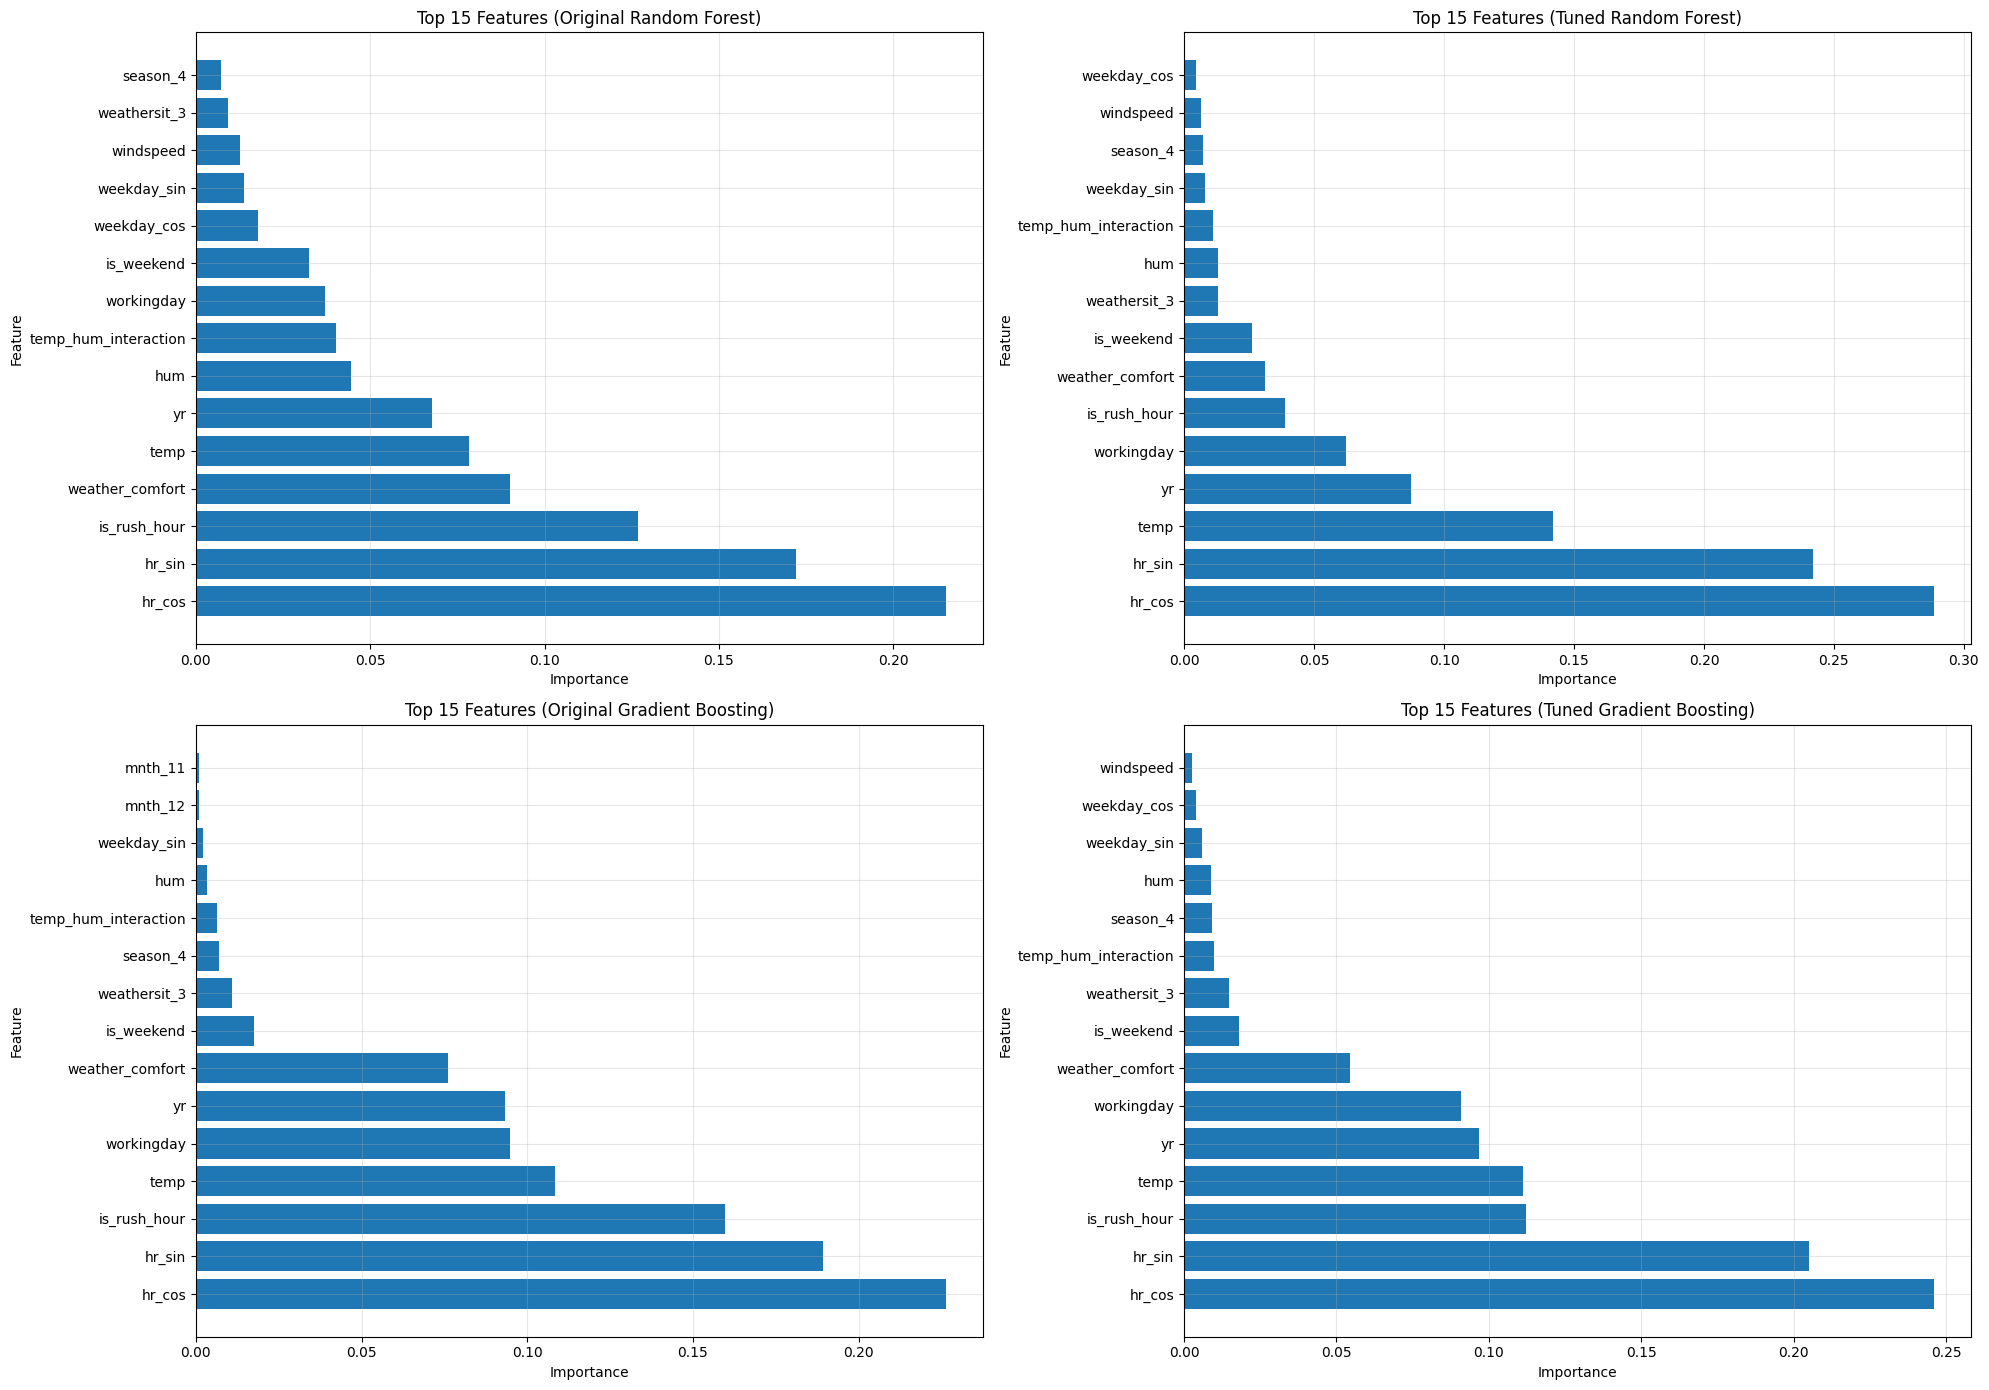

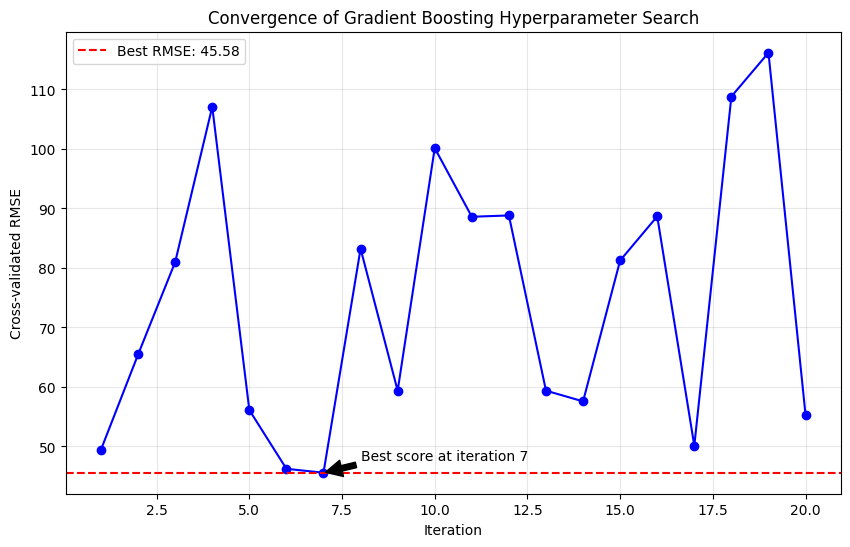

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import scipy.stats as stats

# ----------------------
# Random Forest Tuning
# ----------------------
print("\n1. Random Forest Hyperparameter Tuning:")

# Defining parameter distributions for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

# Initializing RandomizedSearchCV
start_time = time.time()
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=20, 
    cv=5,  
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=1,
    n_jobs=-1  
)

# Fitting the search to the data
rf_random_search.fit(X_train, y_train)
tuning_time = time.time() - start_time

# Evaluating the tuned model
y_train_pred_tuned_rf = best_rf_model.predict(X_train)
y_val_pred_tuned_rf = best_rf_model.predict(X_val)

train_rmse_tuned_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_tuned_rf))
train_r2_tuned_rf = r2_score(y_train, y_train_pred_tuned_rf)
val_rmse_tuned_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_tuned_rf))
val_r2_tuned_rf = r2_score(y_val, y_val_pred_tuned_rf)

print("\nTuned Random Forest Performance:")
print("-" * 50)
print(f"Training RMSE: {train_rmse_tuned_rf:.2f}")
print(f"Training R²: {train_r2_tuned_rf:.4f}")
print(f"Validation RMSE: {val_rmse_tuned_rf:.2f}")
print(f"Validation R²: {val_r2_tuned_rf:.4f}")

# Comparing it with the original Random Forest
print("\nComparison with Original Random Forest:")
print("-" * 50)
print(f"Original Training RMSE: {train_rmse_rf:.2f} → Tuned: {train_rmse_tuned_rf:.2f}")
print(f"Original Validation RMSE: {val_rmse_rf:.2f} → Tuned: {val_rmse_tuned_rf:.2f}")
print(f"Original Training R²: {train_r2_rf:.4f} → Tuned: {train_r2_tuned_rf:.4f}")
print(f"Original Validation R²: {val_r2_rf:.4f} → Tuned: {val_r2_tuned_rf:.4f}")
print(f"Training/Validation RMSE gap: {train_rmse_rf - val_rmse_rf:.2f} → {train_rmse_tuned_rf - val_rmse_tuned_rf:.2f}")

# ----------------------
# Gradient Boosting Tuning
# ----------------------
print("\n2. Gradient Boosting Hyperparameter Tuning:")

# Defining parameter distributions for Gradient Boosting
gb_param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [2, 3, 4, 5],  
    'min_samples_split': [5, 10, 15], 
    'min_samples_leaf': [3, 5, 7] 
}

# Initializing RandomizedSearchCV
start_time = time.time()
gb_random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=gb_param_dist,
    n_iter=20, 
    cv=5,  
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fitting the search to the data
gb_random_search.fit(X_train, y_train)
tuning_time = time.time() - start_time

# Getting the best parameters and model
best_gb_params = gb_random_search.best_params_
best_gb_model = gb_random_search.best_estimator_

# Evaluating the tuned model
y_train_pred_tuned_gb = best_gb_model.predict(X_train)
y_val_pred_tuned_gb = best_gb_model.predict(X_val)

train_rmse_tuned_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_tuned_gb))
train_r2_tuned_gb = r2_score(y_train, y_train_pred_tuned_gb)
val_rmse_tuned_gb = np.sqrt(mean_squared_error(y_val, y_val_pred_tuned_gb))
val_r2_tuned_gb = r2_score(y_val, y_val_pred_tuned_gb)

print("\nTuned Gradient Boosting Performance:")
print("-" * 50)
print(f"Training RMSE: {train_rmse_tuned_gb:.2f}")
print(f"Training R²: {train_r2_tuned_gb:.4f}")
print(f"Validation RMSE: {val_rmse_tuned_gb:.2f}")
print(f"Validation R²: {val_r2_tuned_gb:.4f}")
print(f"Gap (Train-Val RMSE): {train_rmse_tuned_gb - val_rmse_tuned_gb:.2f}")

# Comparing with original Gradient Boosting
print("\nComparison with Original Gradient Boosting:")
print("-" * 50)
print(f"Original Training RMSE: {train_rmse_gb:.2f} → Tuned: {train_rmse_tuned_gb:.2f}")
print(f"Original Validation RMSE: {val_rmse_gb:.2f} → Tuned: {val_rmse_tuned_gb:.2f}")
print(f"Original Training R²: {train_r2_gb:.4f} → Tuned: {train_r2_tuned_gb:.4f}")
print(f"Original Validation R²: {val_r2_gb:.4f} → Tuned: {val_r2_tuned_gb:.4f}")
print(f"Training/Validation RMSE gap: {train_rmse_gb - val_rmse_gb:.2f} → {train_rmse_tuned_gb - val_rmse_tuned_gb:.2f}")

# ----------------------
# Comparing all models
# ----------------------
print("\n3. Final Model Comparison:")
print("-" * 50)
print("Model                     | Training RMSE | Validation RMSE | Training R² | Validation R² | Gap (Train-Val RMSE)")
print("-" * 110)
print(f"Linear Regression          | {train_rmse:.2f}         | {val_rmse:.2f}           | {train_r2:.4f}     | {val_r2:.4f}       | {train_rmse - val_rmse:.2f}")
print(f"Original Random Forest     | {train_rmse_rf:.2f}         | {val_rmse_rf:.2f}           | {train_r2_rf:.4f}     | {val_r2_rf:.4f}       | {train_rmse_rf - val_rmse_rf:.2f}")
print(f"Tuned Random Forest        | {train_rmse_tuned_rf:.2f}         | {val_rmse_tuned_rf:.2f}           | {train_r2_tuned_rf:.4f}     | {val_r2_tuned_rf:.4f}       | {train_rmse_tuned_rf - val_rmse_tuned_rf:.2f}")
print(f"Original Gradient Boosting | {train_rmse_gb:.2f}         | {val_rmse_gb:.2f}           | {train_r2_gb:.4f}     | {val_r2_gb:.4f}       | {train_rmse_gb - val_rmse_gb:.2f}")
print(f"Tuned Gradient Boosting    | {train_rmse_tuned_gb:.2f}         | {val_rmse_tuned_gb:.2f}           | {train_r2_tuned_gb:.4f}     | {val_r2_tuned_gb:.4f}       | {train_rmse_tuned_gb - val_rmse_tuned_gb:.2f}")

# Creating a bar plot comparing validation RMSE of all models
models = ['Linear Regression', 'Original RF', 'Tuned RF', 'Original GB', 'Tuned GB']
val_rmses = [val_rmse, val_rmse_rf, val_rmse_tuned_rf, val_rmse_gb, val_rmse_tuned_gb]
val_r2s = [val_r2, val_r2_rf, val_r2_tuned_rf, val_r2_gb, val_r2_tuned_gb]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(models, val_rmses, color=['blue', 'green', 'darkgreen', 'red', 'darkred'])
plt.ylabel('Validation RMSE')
plt.title('Validation RMSE Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.2f}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
bars = plt.bar(models, val_r2s, color=['blue', 'green', 'darkgreen', 'red', 'darkred'])
plt.ylabel('Validation R²')
plt.title('Validation R² Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')


# Visualizing feature importance for all models
plt.figure(figsize=(20, 14))

# Original Random Forest
plt.subplot(2, 2, 1)
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance_rf = feature_importance_rf.sort_values('Importance', ascending=False)
top_features_rf = feature_importance_rf.head(15)
plt.barh(top_features_rf['Feature'], top_features_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Features (Original Random Forest)')
plt.grid(True, alpha=0.3)

# Tuned Random Forest
plt.subplot(2, 2, 2)
feature_importance_rf_tuned = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf_model.feature_importances_
})
feature_importance_rf_tuned = feature_importance_rf_tuned.sort_values('Importance', ascending=False)
top_features_rf_tuned = feature_importance_rf_tuned.head(15)
plt.barh(top_features_rf_tuned['Feature'], top_features_rf_tuned['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Features (Tuned Random Forest)')
plt.grid(True, alpha=0.3)

# Original Gradient Boosting
plt.subplot(2, 2, 3)
feature_importance_gb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
})
feature_importance_gb = feature_importance_gb.sort_values('Importance', ascending=False)
top_features_gb = feature_importance_gb.head(15)
plt.barh(top_features_gb['Feature'], top_features_gb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Features (Original Gradient Boosting)')
plt.grid(True, alpha=0.3)

# Tuned Gradient Boosting
plt.subplot(2, 2, 4)
feature_importance_gb_tuned = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_gb_model.feature_importances_
})
feature_importance_gb_tuned = feature_importance_gb_tuned.sort_values('Importance', ascending=False)
top_features_gb_tuned = feature_importance_gb_tuned.head(15)
plt.barh(top_features_gb_tuned['Feature'], top_features_gb_tuned['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Features (Tuned Gradient Boosting)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Adding optimizer convergence visualization for Gradient Boosting
plt.figure(figsize=(10, 6))

cv_results = gb_random_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
iterations = range(1, len(mean_test_scores) + 1)
mean_test_rmse = np.sqrt(-mean_test_scores)
sorted_indices = np.argsort(iterations)
sorted_rmse = mean_test_rmse[sorted_indices]

# Plotting the convergence
plt.plot(iterations, sorted_rmse, 'o-', color='blue')
plt.axhline(y=np.sqrt(-gb_random_search.best_score_), color='red', linestyle='--', 
            label=f'Best RMSE: {np.sqrt(-gb_random_search.best_score_):.2f}')

# Annotating the best iteration
best_iteration = np.argmin(mean_test_rmse) + 1
plt.annotate(f'Best score at iteration {best_iteration}', 
             xy=(best_iteration, np.sqrt(-gb_random_search.best_score_)),
             xytext=(best_iteration + 1, np.sqrt(-gb_random_search.best_score_) + 2),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('Iteration')
plt.ylabel('Cross-validated RMSE')
plt.title('Convergence of Gradient Boosting Hyperparameter Search')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Task 9: Final Model Selection and Testing


1. Best Model Selection:
Based on model performance analysis, the Tuned Gradient Boosting model is selected as the final model.

2. Retraining on Combined Data:
Original training set size: 10427 samples
Validation set size: 3476 samples
Combined training set size: 13903 samples

Using the following parameters for the final model:
- learning_rate: 0.1
- max_depth: 5
- min_samples_leaf: 5
- min_samples_split: 10
- n_estimators: 300

3. Final Model Test Performance:
--------------------------------------------------
Test MSE: 1715.68
Test RMSE: 41.42
Test MAE: 26.69
Test R²: 0.9458

4. Comparison with Validation Performance:
--------------------------------------------------
Validation RMSE: 44.00 → Test RMSE: 41.42
Validation R²: 0.9405 → Test R²: 0.9458


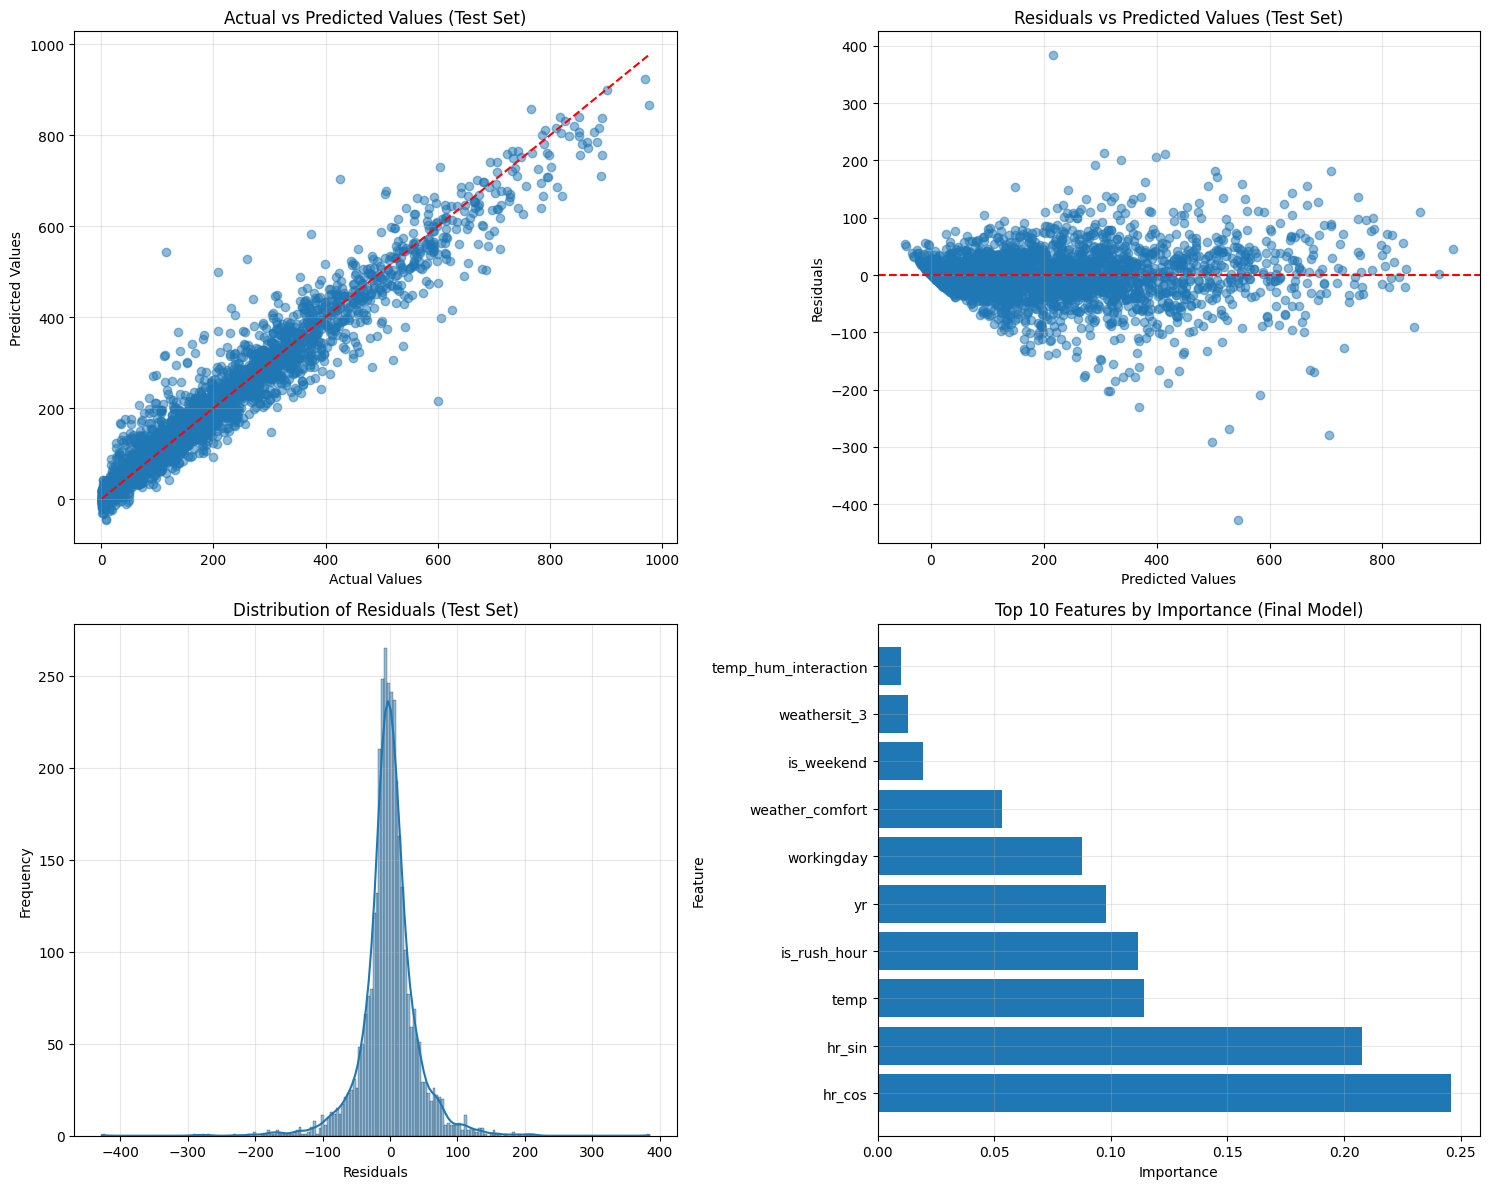

In [142]:
print("\n1. Best Model Selection:")
print("Based on model performance analysis, the Tuned Gradient Boosting model is selected as the final model.")

# Combining training and validation sets
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

print(f"\n2. Retraining on Combined Data:")
print(f"Original training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Combined training set size: {X_train_val.shape[0]} samples")

# Initializing the final model with the best parameters found
best_params = best_gb_model.get_params()
print("\nUsing the following parameters for the final model:")
for param, value in {k: v for k, v in best_params.items() if k in ['learning_rate', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'n_estimators']}.items():
    print(f"- {param}: {value}")

# Training the final model on combined data
final_model = GradientBoostingRegressor(**best_params)
final_model.fit(X_train_val, y_train_val)

# Make predictions on test set
y_test_pred = final_model.predict(X_test)

# Calculating metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n3. Final Model Test Performance:")
print("-" * 50)
print(f"Test MSE: {test_mse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test R²: {test_r2:.4f}")

# Comparing with validation performance
print("\n4. Comparison with Validation Performance:")
print("-" * 50)
print(f"Validation RMSE: {val_rmse_tuned_gb:.2f} → Test RMSE: {test_rmse:.2f}")
print(f"Validation R²: {val_r2_tuned_gb:.4f} → Test R²: {test_r2:.4f}")

# Visualizing test set predictions
plt.figure(figsize=(15, 12))

# Plot 1: Actual vs Predicted values for test set
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals vs Predicted values
test_residuals = y_test - y_test_pred
plt.subplot(2, 2, 2)
plt.scatter(y_test_pred, test_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.grid(True, alpha=0.3)

# Plot 3: Histogram of residuals
plt.subplot(2, 2, 3)
sns.histplot(test_residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Test Set)')
plt.grid(True, alpha=0.3)

# Plot 4: Feature importance
plt.subplot(2, 2, 4)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': final_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
top_features = feature_importance.head(10)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features by Importance (Final Model)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
